In [728]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas_profiling
import warnings
warnings.filterwarnings('ignore')

In [729]:
df=pd.read_excel("Assignment.xlsx", sheet_name="data")

In [730]:
df

Make       Model  Year                Engine Fuel Type  Engine HP  \
0          BMW  1 Series M  2011     premium unleaded (required)      335.0   
1          BMW    1 Series  2011     premium unleaded (required)      300.0   
2          BMW    1 Series  2011     premium unleaded (required)      300.0   
3          BMW    1 Series  2011     premium unleaded (required)      230.0   
4          BMW    1 Series  2011     premium unleaded (required)      230.0   
...        ...         ...   ...                             ...        ...   
11909    Acura         ZDX  2012     premium unleaded (required)      300.0   
11910    Acura         ZDX  2012     premium unleaded (required)      300.0   
11911    Acura         ZDX  2012     premium unleaded (required)      300.0   
11912    Acura         ZDX  2013  premium unleaded (recommended)      300.0   
11913  Lincoln      Zephyr  2006                regular unleaded      221.0   

       Engine Cylinders Transmission Type      Driven_Wheels  Number of Doors  \
0                   6.0            MANUAL   rear wheel drive              2.0   
1                   6.0            MANUAL   rear wheel drive              2.0   
2                   6.0            MANUAL   rear wheel drive              2.0   
3                   6.0            MANUAL   rear wheel drive              2.0   
4                   6.0            MANUAL   rear wheel drive              2.0   
...                 ...               ...                ...              ...   
11909               6.0         AUTOMATIC    all wheel drive              4.0   
11910               6.0         AUTOMATIC    all wheel drive              4.0   
11911               6.0         AUTOMATIC    all wheel drive              4.0   
11912               6.0         AUTOMATIC    all wheel drive              4.0   
11913               6.0         AUTOMATIC  front wheel drive              4.0   

                             Market Category Vehicle Size  Vehicle Style  \
0      Factory Tuner,Luxury,High-Performance      Compact          Coupe   
1                         Luxury,Performance      Compact    Convertible   
2                    Luxury,High-Performance      Compact          Coupe   
3                         Luxury,Performance      Compact          Coupe   
4                                     Luxury      Compact    Convertible   
...                                      ...          ...            ...   
11909             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11910             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11911             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11912             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11913                                 Luxury      Midsize          Sedan   

       highway MPG  city mpg  Popularity  Price  
0               26        19        3916  46135  
1               28        19        3916  40650  
2               28        20        3916  36350  
3               28        18        3916  29450  
4               28        18        3916  34500  
...            ...       ...         ...    ...  
11909           23        16         204  46120  
11910           23        16         204  56670  
11911           23        16         204  50620  
11912           23        16         204  50920  
11913           26        17          61  28995  

[11914 rows x 16 columns]

In [731]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'Price'],
      dtype='object')

In [732]:
df.isnull().sum().sort_values(ascending=False)

Market Category      3742
Engine HP              69
Engine Cylinders       30
Number of Doors         6
Engine Fuel Type        3
Price                   0
Popularity              0
city mpg                0
highway MPG             0
Vehicle Style           0
Vehicle Size            0
Driven_Wheels           0
Transmission Type       0
Year                    0
Model                   0
Make                    0
dtype: int64

<AxesSubplot:>

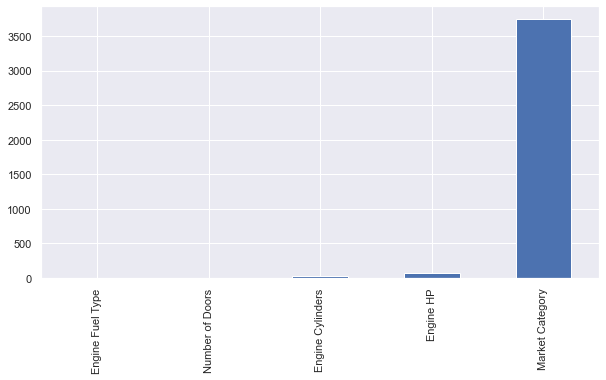

In [733]:
plt.figure(figsize=(10,5))
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [734]:
df = df.fillna({
        'Engine Cylinders' : df['Engine Cylinders'].ffill(),
        'Engine HP' : df['Engine HP'].bfill()
    })

In [735]:
df['Engine Fuel Type'].fillna(df['Engine Fuel Type'].mode()[0], inplace=True)


In [736]:
df['Number of Doors'].fillna(df['Number of Doors'].mode()[0], inplace=True)

In [737]:
df2 = df.rename(columns={"Engine Fuel Type":"Engine_Fuel_Type","Engine HP":"Engine_HP","Engine Cylinders":"Engine_Cylinders",
                     "Transmission Type":"Transmission_Type","Number of Doors":"Number_of_Doors","Market Category":"Market_Category",
                     "Vehicle Size":"Vehicle_Size","Vehicle Style":"Vehicle_Style","highway MPG":"highway_MPG","city mpg":"city_mpg"})

In [738]:
df2.columns

Index(['Make', 'Model', 'Year', 'Engine_Fuel_Type', 'Engine_HP',
       'Engine_Cylinders', 'Transmission_Type', 'Driven_Wheels',
       'Number_of_Doors', 'Market_Category', 'Vehicle_Size', 'Vehicle_Style',
       'highway_MPG', 'city_mpg', 'Popularity', 'Price'],
      dtype='object')

In [739]:
df2.groupby(['Transmission_Type']).agg(mod  = ('Market_Category', lambda x: x.value_counts().index[0]))

mod
Transmission_Type                                     
AUTOMATED_MANUAL               Exotic,High-Performance
AUTOMATIC                                    Crossover
DIRECT_DRIVE                                 Hatchback
MANUAL                                       Hatchback
UNKNOWN            Hatchback,Factory Tuner,Performance

In [740]:
df2['Vehicle_Size'].value_counts()

Compact    4764
Midsize    4373
Large      2777
Name: Vehicle_Size, dtype: int64

In [741]:
df2['Vehicle_Style'].value_counts()

Sedan                  3048
4dr SUV                2488
Coupe                  1211
Convertible             793
4dr Hatchback           702
Crew Cab Pickup         681
Extended Cab Pickup     623
Wagon                   592
2dr Hatchback           506
Passenger Minivan       417
Regular Cab Pickup      392
2dr SUV                 138
Passenger Van           128
Cargo Van                95
Cargo Minivan            71
Convertible SUV          29
Name: Vehicle_Style, dtype: int64

In [742]:
Popultn = df2.groupby(['Make']).agg(mean  = ('Popularity',lambda x: x.mean()))

In [743]:
len(Popultn)

48

In [744]:
Popultn.sort_values(by = 'mean', ascending = False)

mean
Make               
Ford           5657
BMW            3916
Audi           3105
Ferrari        2774
Honda          2202
Toyota         2031
Nissan         2009
Dodge          1851
Kia            1720
Porsche        1715
Cadillac       1624
Hyundai        1439
Tesla          1391
Chevrolet      1385
Lamborghini    1158
Chrysler       1013
Volkswagen      873
Volvo           870
Bugatti         820
FIAT            819
Subaru          640
Mercedes-Benz   617
Lotus           613
Mazda           586
GMC             549
Plymouth        535
Bentley         520
Suzuki          481
Lexus           454
Mitsubishi      436
McLaren         416
Saab            376
Aston Martin    259
Land Rover      258
Maserati        238
Pontiac         210
Acura           204
Infiniti        190
Buick           155
HUMMER          130
Alfa Romeo      113
Scion           105
Rolls-Royce      86
Maybach          67
Lincoln          61
Oldsmobile       26
Genesis          21
Spyker            2

In [745]:
df2['Engine_Cylinders'].value_counts()

4.0     4752
6.0     4511
8.0     2035
12.0     231
5.0      225
10.0      71
0.0       56
3.0       30
16.0       3
Name: Engine_Cylinders, dtype: int64

In [746]:
df2.groupby(['Vehicle_Size']).agg(mod  = ('Market_Category',lambda x: x.mode()))

mod
Vehicle_Size           
Compact       Hatchback
Large         Flex Fuel
Midsize       Crossover

In [747]:
df2["Engine_Fuel_Type"].value_counts()

regular unleaded                                7175
premium unleaded (required)                     2009
premium unleaded (recommended)                  1523
flex-fuel (unleaded/E85)                         899
diesel                                           154
electric                                          66
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: Engine_Fuel_Type, dtype: int64

In [748]:
df2['Transmission_Type'].value_counts()

AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: Transmission_Type, dtype: int64

In [749]:
df2.groupby(['Engine_Fuel_Type']).agg(mod = ('Market_Category',lambda x: x.mode()))

mod
Engine_Fuel_Type                                                               
diesel                                                            Diesel,Luxury
electric                                                              Hatchback
flex-fuel (premium unleaded recommended/E85)                   Flex Fuel,Luxury
flex-fuel (premium unleaded required/E85)     Flex Fuel,Luxury,High-Performance
flex-fuel (unleaded/E85)                                              Flex Fuel
flex-fuel (unleaded/natural gas)                          Flex Fuel,Performance
natural gas                                                                  []
premium unleaded (recommended)                                           Luxury
premium unleaded (required)                                  Luxury,Performance
regular unleaded                                                      Crossover

In [750]:
df2.duplicated().sum()

715

## Univariate Analysis

In [751]:
pandas_profiling.ProfileReport(df2)

In [752]:
df2['Make'].value_counts()

Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            69
FIAT               62
Scion              60
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Tesla              18
HUMMER             17
Maybach            16
Alfa Romeo          5
McLaren             5
Bugatti   

<AxesSubplot:>

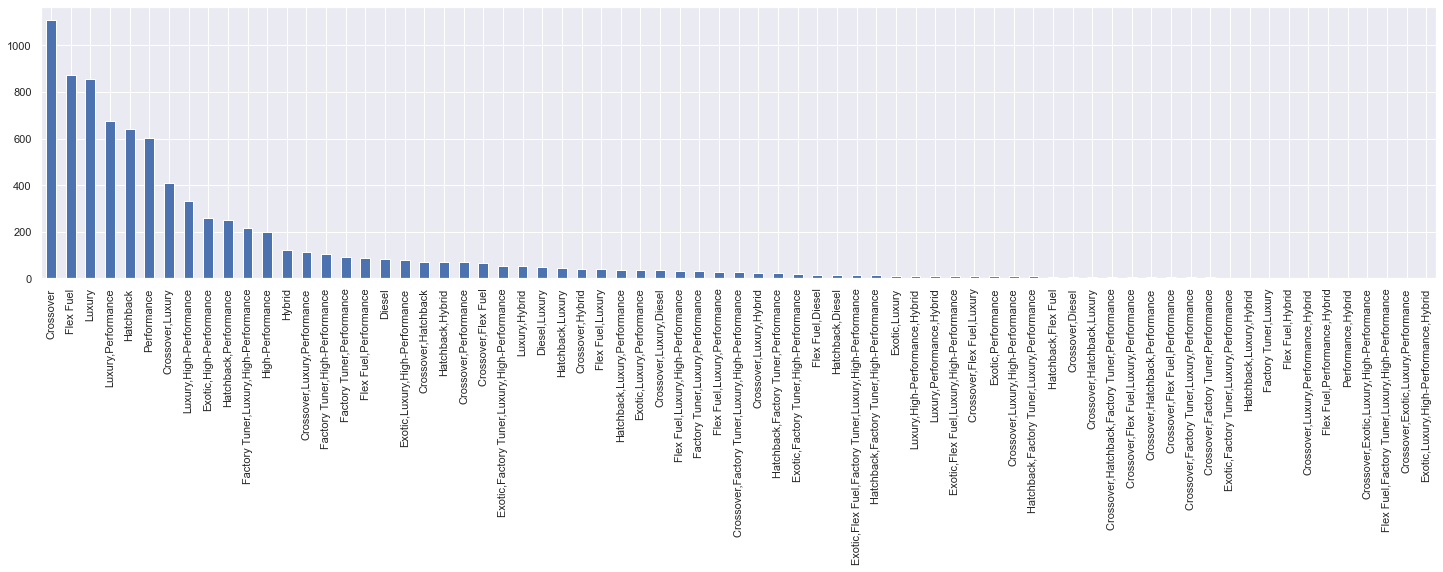

In [753]:
fig, ax = plt.subplots()
df2['Market_Category'].value_counts().plot(ax=ax, kind='bar', figsize=(25,5))

Text(0.5, 1.0, 'Distribution of Engine Fuel Type')

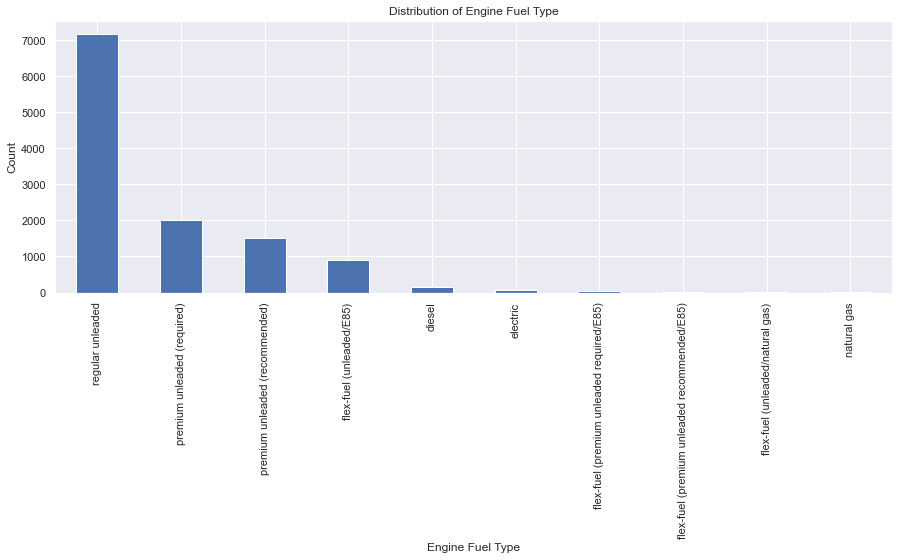

In [754]:
fig, ax = plt.subplots()
df2['Engine_Fuel_Type'].value_counts().plot(ax=ax, kind='bar',figsize=(15,5))
plt.ylabel('Count')
plt.xlabel('Engine Fuel Type')
plt.title('Distribution of Engine Fuel Type')

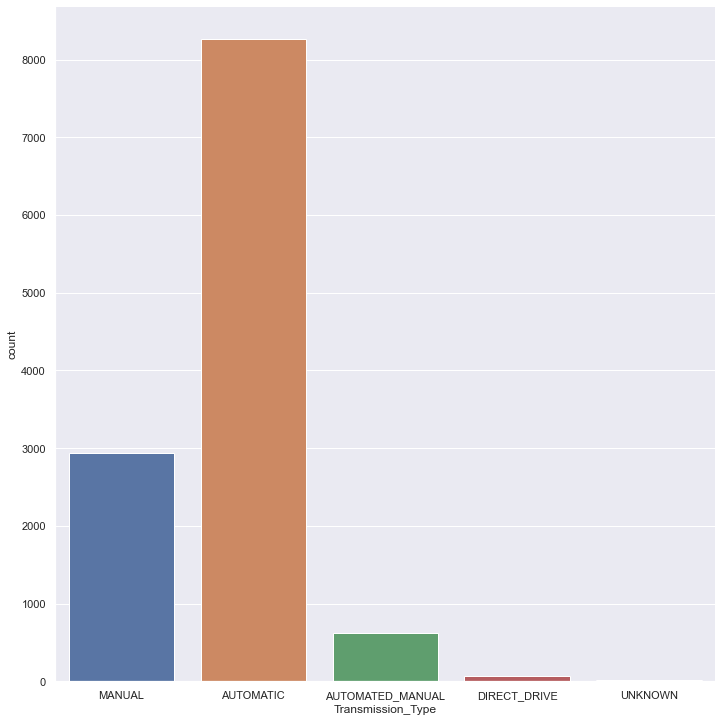

In [755]:
sns.catplot(x="Transmission_Type", kind='count', data=df2, height=10, legend=True)
plt.show()

<AxesSubplot:xlabel='Vehicle_Size', ylabel='count'>

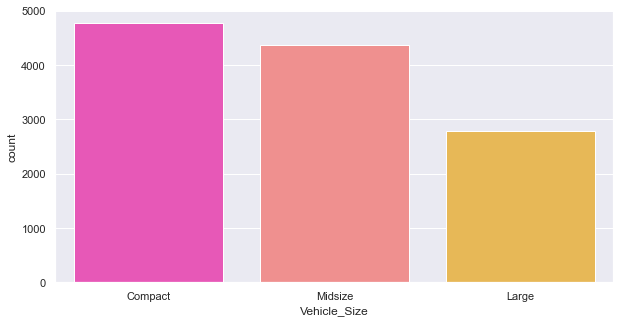

In [756]:
plt.figure(figsize = (10,5))
sns.countplot(x='Vehicle_Size',data = df2, palette = 'spring')

<AxesSubplot:>

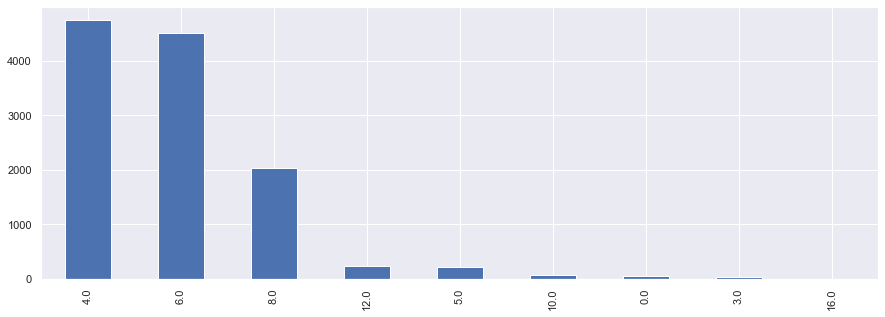

In [757]:
fig, ax = plt.subplots()
df2['Engine_Cylinders'].value_counts().plot(ax=ax, kind='bar',figsize=(15,5))

<AxesSubplot:>

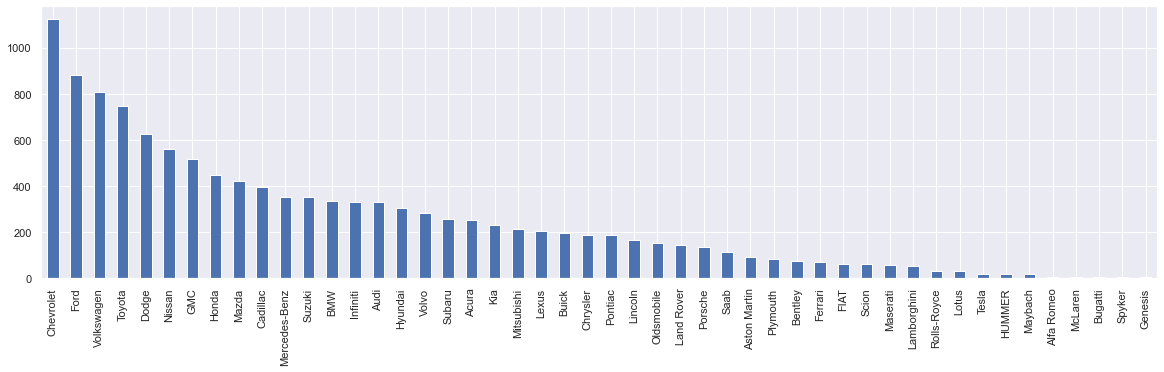

In [758]:
fig, ax = plt.subplots()
df2['Make'].value_counts().plot(ax=ax, kind='bar', figsize=(20,5))

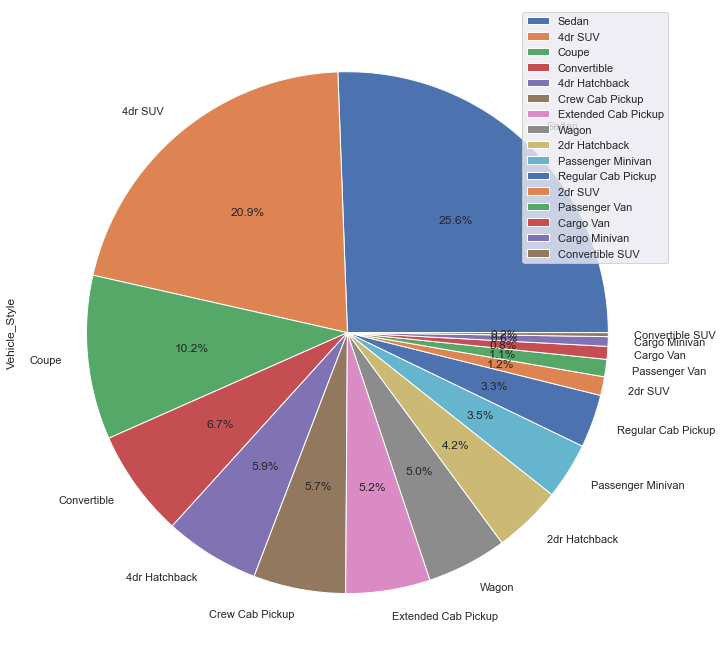

In [759]:
plt.figure(figsize=(12,12))
df2['Vehicle_Style'].value_counts().plot(kind='pie',autopct='%1.1f%%',legend = True)
plt.show()

<AxesSubplot:xlabel='Engine_HP', ylabel='Density'>

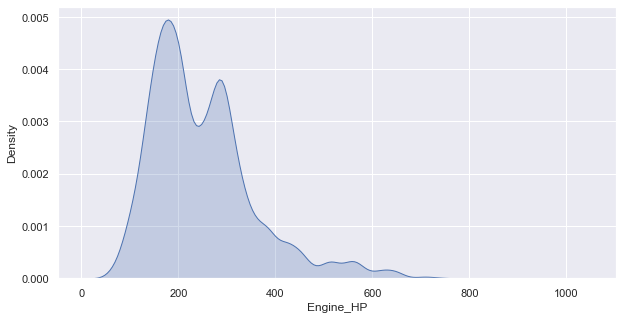

In [760]:
sns.set(rc={'figure.figsize':(10,5)})
sns.kdeplot(df2['Engine_HP'],shade=True)

<AxesSubplot:>

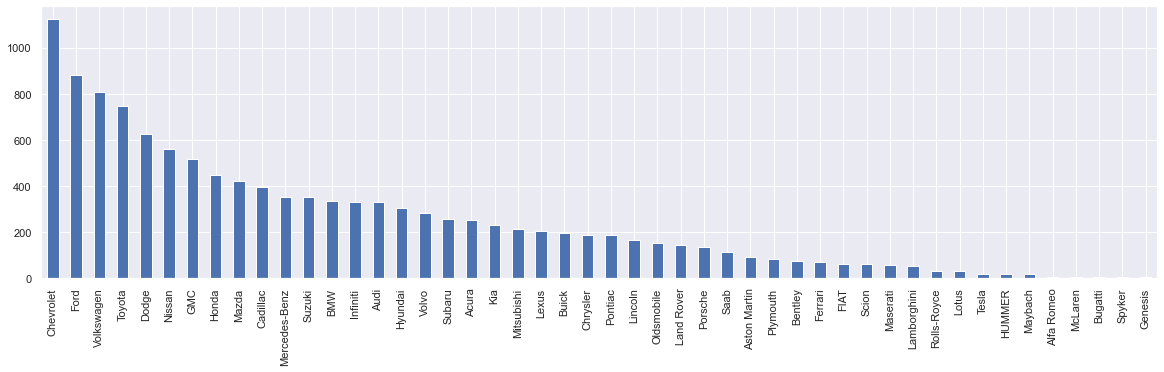

In [761]:
fig, ax = plt.subplots()
df2['Make'].value_counts().plot(ax=ax, kind='bar', figsize=(20,5))

In [762]:
df2['Engine_Fuel_Type'].value_counts()

regular unleaded                                7175
premium unleaded (required)                     2009
premium unleaded (recommended)                  1523
flex-fuel (unleaded/E85)                         899
diesel                                           154
electric                                          66
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: Engine_Fuel_Type, dtype: int64

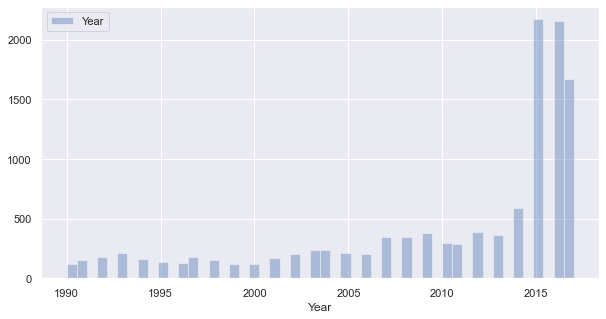

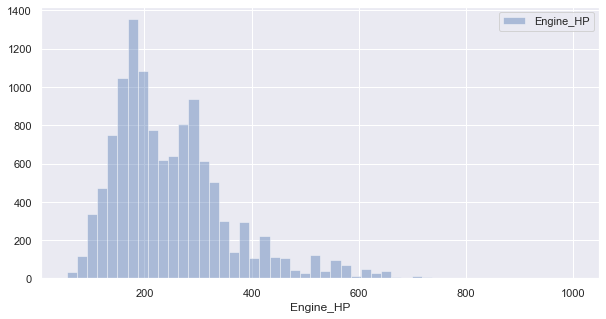

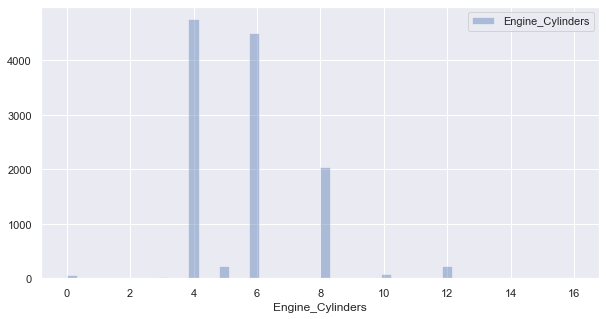

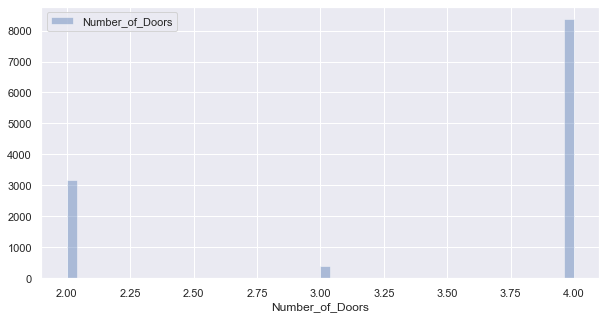

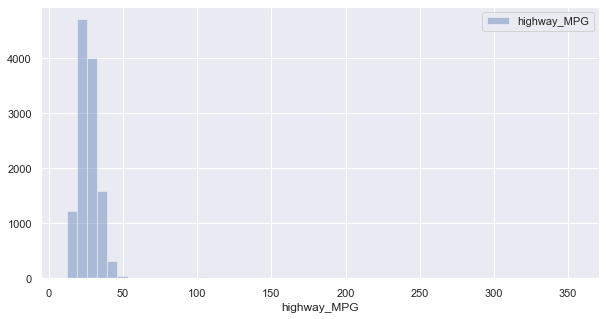

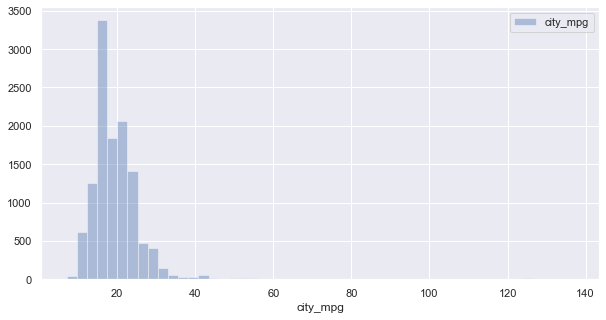

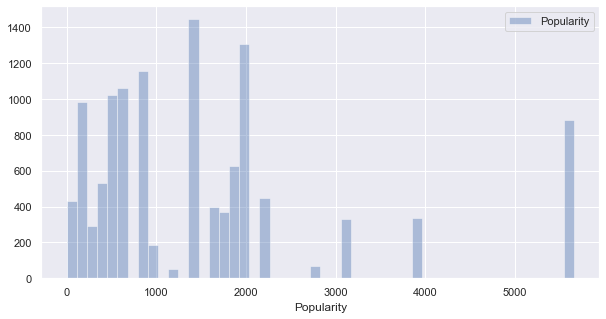

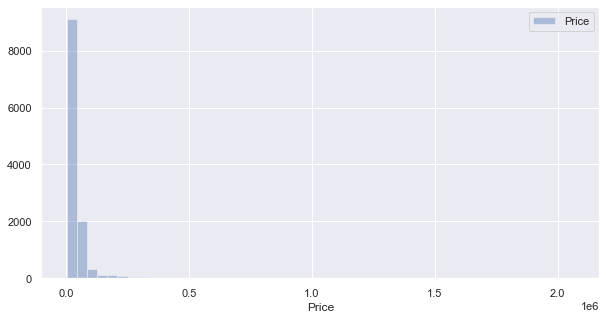

In [763]:
# For Non-Categorical 
for val in df2.drop(['Make','Model','Engine_Fuel_Type','Transmission_Type','Driven_Wheels','Market_Category','Vehicle_Size','Vehicle_Style'], axis = 1):
    sns.distplot(df2[val], kde = False,bins=50,label=val)
    plt.legend()
    plt.show()

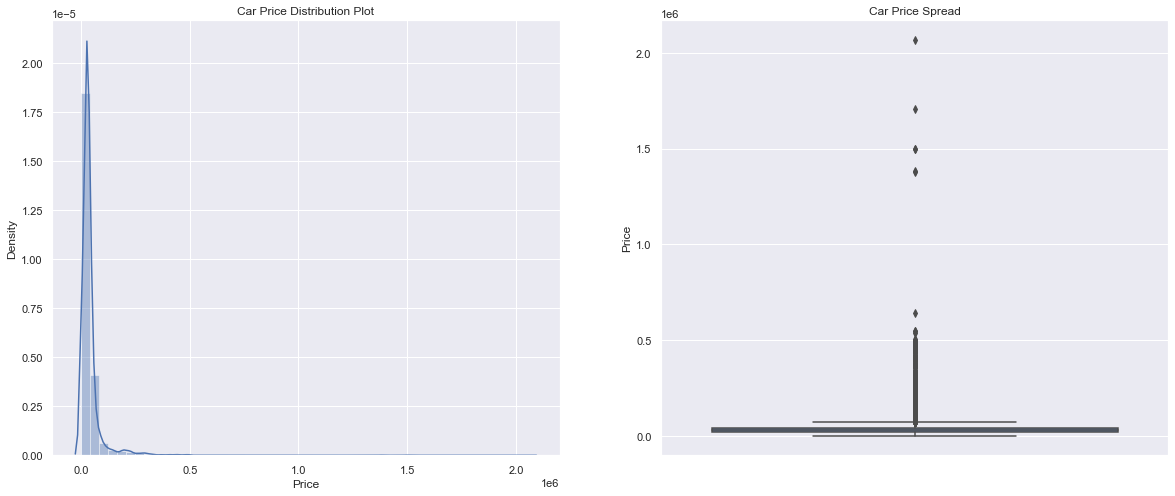

In [764]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df2.Price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df2.Price)

plt.show()

### Bivariate Analysis

In [765]:
df2.columns

Index(['Make', 'Model', 'Year', 'Engine_Fuel_Type', 'Engine_HP',
       'Engine_Cylinders', 'Transmission_Type', 'Driven_Wheels',
       'Number_of_Doors', 'Market_Category', 'Vehicle_Size', 'Vehicle_Style',
       'highway_MPG', 'city_mpg', 'Popularity', 'Price'],
      dtype='object')

In [766]:
df2['Model'] = df2['Model'].astype('|S80') #converting model datatype to string of length 80 bytes

In [767]:
##Calculating Statistics

##Minimum price of the train_data
minimum_price = np.min(df2['Price'])

##Maximum price of the train_data
maximum_price = np.max(df2['Price'])

##Mean price of the train_data
mean_price = np.mean(df2['Price'])

##Median price of the train_data
median_price = np.median(df2['Price'])

##Standard deviation of prices of the train_data
std_price = np.std(df2['Price'])

##Show the calculated statistics
print("Statistics for dataset:\n")
print("Minimum price:", minimum_price)
print("Maximum price:",maximum_price)
print("Mean price:",mean_price)
print("Median price:",median_price)
print("Standard deviation of price:",std_price)

Statistics for dataset:

Minimum price: 2000
Maximum price: 2065902
Mean price: 40594.737032063116
Median price: 29995.0
Standard deviation of price: 60106.5809259237


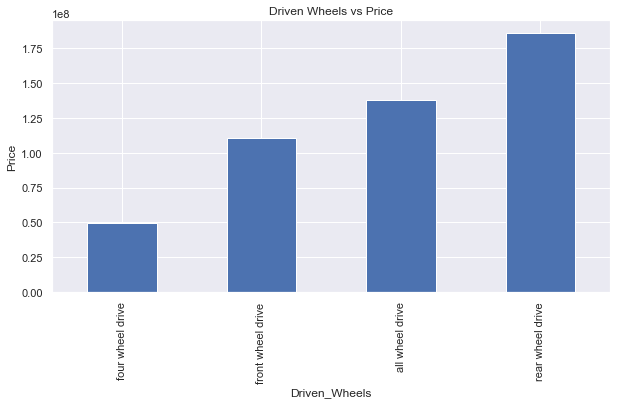

In [768]:
df2.groupby(['Driven_Wheels'])['Price'].sum().sort_values(ascending=True).plot(kind='bar')
plt.title('Driven Wheels vs Price')
plt.ylabel("Price")
plt.show()

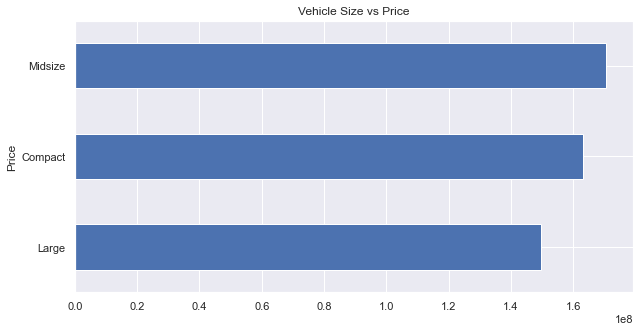

In [769]:
df2.groupby(['Vehicle_Size'])['Price'].sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Vehicle Size vs Price')
plt.ylabel("Price")
plt.show()

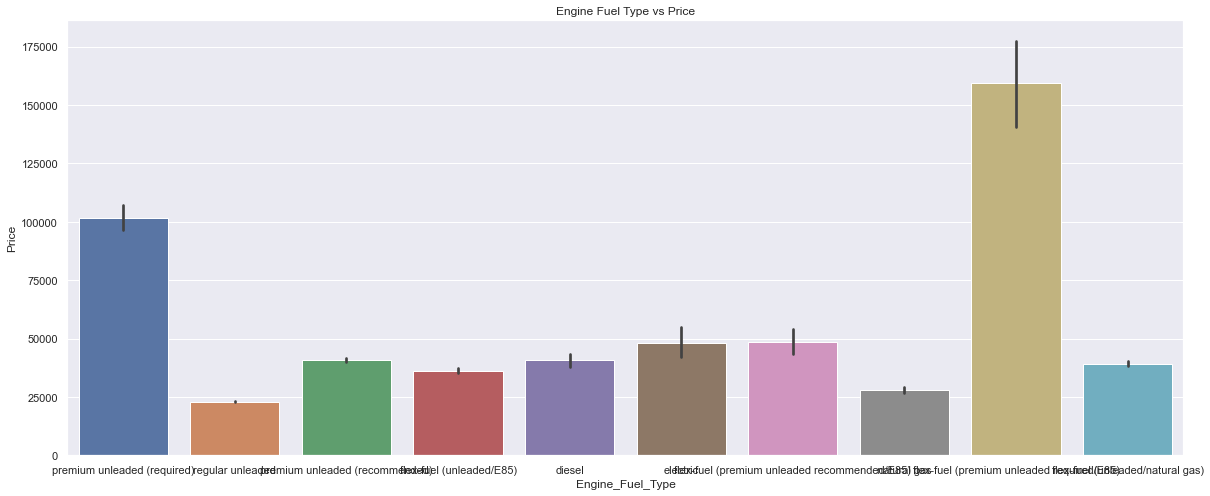

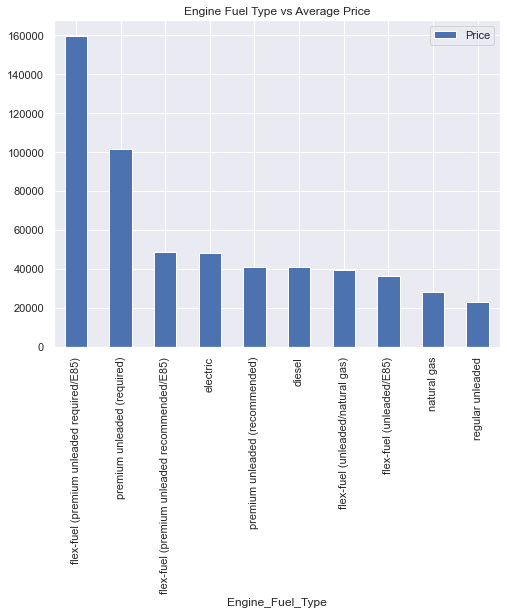

In [770]:
plt.figure(figsize=(20,8))

plt.title('Engine Fuel Type vs Price')
sns.barplot(x=df2['Engine_Fuel_Type'], y=df2['Price'], palette=("deep"))

plt.show()

df = pd.DataFrame(df2.groupby(['Engine_Fuel_Type'])['Price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Fuel Type vs Average Price')
plt.show()

<AxesSubplot:xlabel='Transmission_Type', ylabel='Price'>

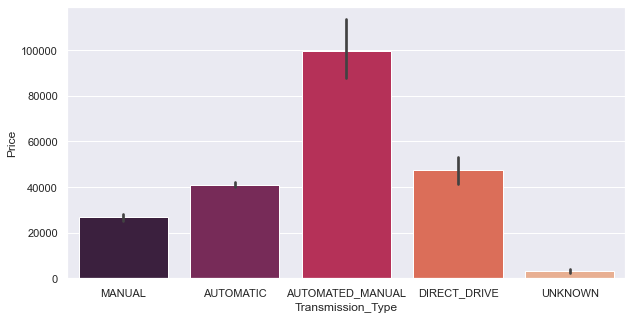

In [771]:
plt.figure(figsize=(10,5))
sns.barplot(x="Transmission_Type", y="Price", palette="rocket", data=df2)

<AxesSubplot:xlabel='Engine_HP', ylabel='Price'>

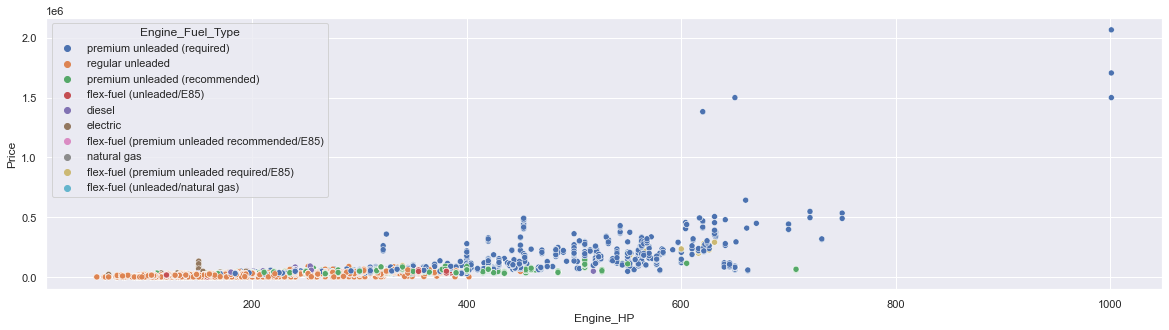

In [772]:
plt.figure(figsize=(20, 5))
sns.scatterplot(x=df2['Engine_HP'], y=df2['Price'], hue=df2['Engine_Fuel_Type'])

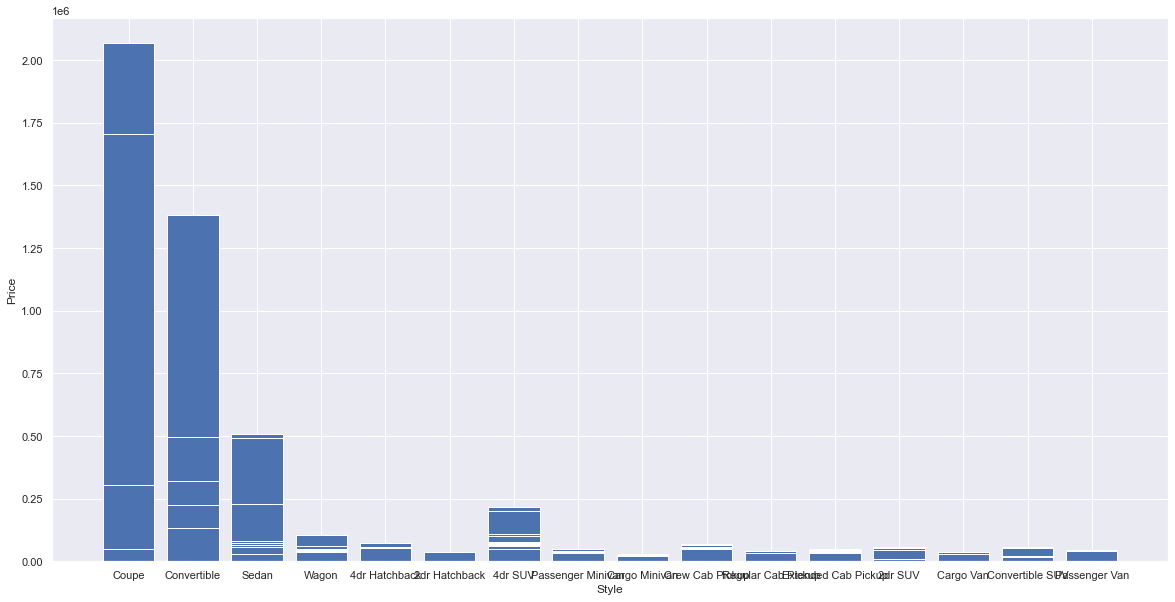

In [773]:
plt.figure(figsize=(20,10))
plt.bar(df2["Vehicle_Style"], df2["Price"])
plt.xlabel("Style")
plt.ylabel("Price")
plt.show()

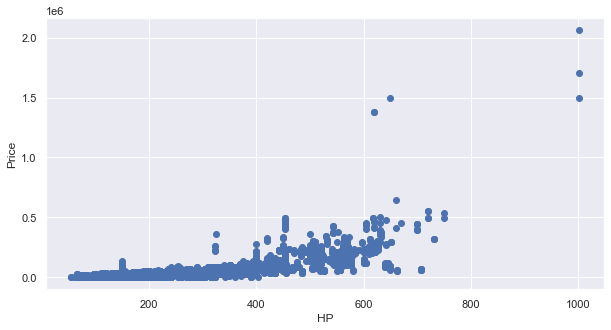

In [774]:
plt.scatter(df2["Engine_HP"], df2["Price"])
plt.xlabel("HP")
plt.ylabel("Price")
plt.show()

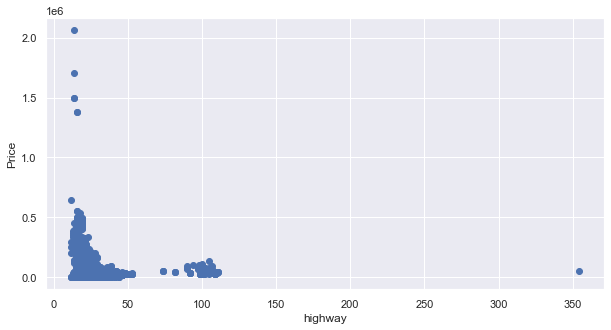

In [775]:
plt.scatter(df2["highway_MPG"], df2["Price"])
plt.xlabel("highway")
plt.ylabel("Price")
plt.show()

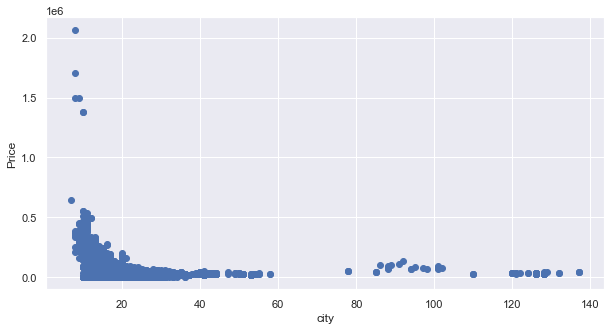

In [776]:
plt.scatter(df2["city_mpg"], df2["Price"])
plt.xlabel("city")
plt.ylabel("Price")
plt.show()

In [777]:
df2['Model'].value_counts()

b'Silverado 1500'        156
b'Tundra'                140
b'F-150'                 126
b'Sierra 1500'            90
b'Beetle Convertible'     89
                        ... 
b'570S'                    1
b'MKZ Hybrid'              1
b'LFA'                     1
b'Enzo'                    1
b'Diablo'                  1
Name: Model, Length: 915, dtype: int64

In [778]:
df2.groupby(['Vehicle_Style']).agg(mod  = ('Vehicle_Size',lambda x: x.mode()))

mod
Vehicle_Style               
2dr Hatchback        Compact
2dr SUV              Compact
4dr Hatchback        Compact
4dr SUV              Midsize
Cargo Minivan        Compact
Cargo Van            Midsize
Convertible          Compact
Convertible SUV      Compact
Coupe                Compact
Crew Cab Pickup        Large
Extended Cab Pickup    Large
Passenger Minivan    Midsize
Passenger Van        Midsize
Regular Cab Pickup     Large
Sedan                Midsize
Wagon                Compact

## Multivariate

In [779]:
import statsmodels.api as sm  # Statical learning

In [780]:
corr_data = df2.corr()

In [781]:
corr_data

Year  Engine_HP  Engine_Cylinders  Number_of_Doors  \
Year              1.000000   0.348603         -0.040684         0.263946   
Engine_HP         0.348603   1.000000          0.770067        -0.103836   
Engine_Cylinders -0.040684   0.770067          1.000000        -0.139021   
Number_of_Doors   0.263946  -0.103836         -0.139021         1.000000   
highway_MPG       0.258240  -0.378659         -0.590474         0.118925   
city_mpg          0.198171  -0.377766         -0.551360         0.121206   
Popularity        0.073049   0.034590          0.040227        -0.048251   
Price             0.227590   0.659650          0.530133        -0.126081   

                  highway_MPG  city_mpg  Popularity     Price  
Year                 0.258240  0.198171    0.073049  0.227590  
Engine_HP           -0.378659 -0.377766    0.034590  0.659650  
Engine_Cylinders    -0.590474 -0.551360    0.040227  0.530133  
Number_of_Doors      0.118925  0.121206   -0.048251 -0.126081  
highway_MPG          1.000000  0.886829   -0.020991 -0.160043  
city_mpg             0.886829  1.000000   -0.003217 -0.157676  
Popularity          -0.020991 -0.003217    1.000000 -0.048476  
Price               -0.160043 -0.157676   -0.048476  1.000000

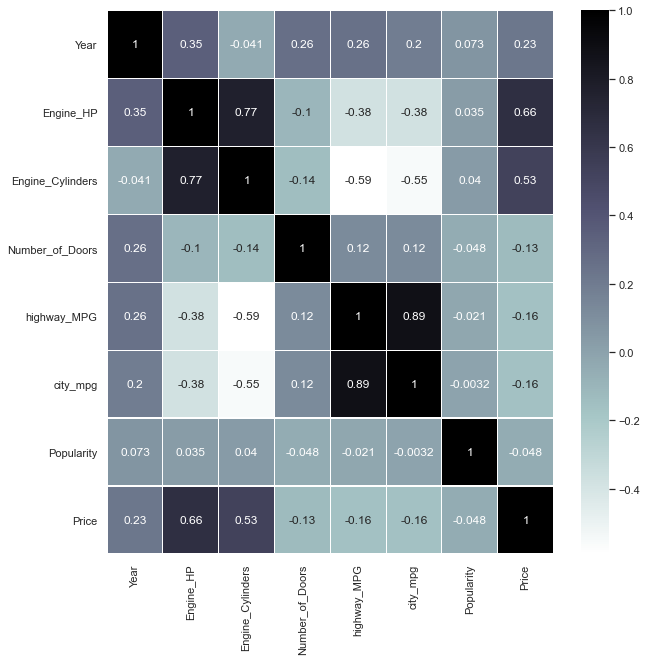

In [782]:
#import seaborn as sns
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr_data, ax=ax,cmap="bone_r", linewidths=0.1, annot = True)
plt.show()

In [783]:
df2['Current_Year'] = 2020

In [784]:
df2['No_of_year'] = df2['Current_Year']-df2['Year']

In [785]:
df2['No_of_year'].unique()

array([ 9,  8,  7, 28, 27, 26,  3, 29,  4, 30,  5, 24, 23, 22,  6, 21, 18,
       17, 16, 25, 13, 12, 11, 19, 10, 20, 15, 14], dtype=int64)

In [786]:
df2.drop(['Year','Current_Year'],axis=1,inplace=True)

In [787]:
corr_data= df2.corr()

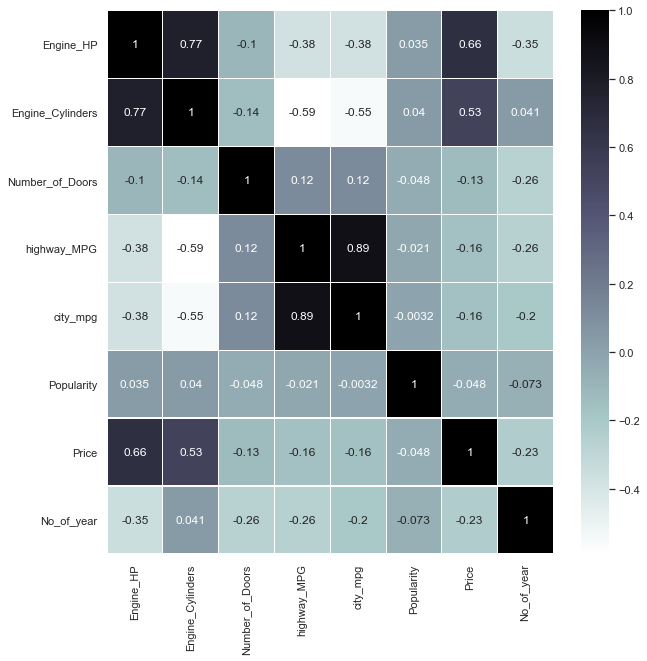

In [788]:
#import seaborn as sns
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr_data, ax=ax,cmap="bone_r", linewidths=0.1, annot = True)
plt.show()

In [789]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  |S80   
 2   Engine_Fuel_Type   11914 non-null  object 
 3   Engine_HP          11914 non-null  float64
 4   Engine_Cylinders   11914 non-null  float64
 5   Transmission_Type  11914 non-null  object 
 6   Driven_Wheels      11914 non-null  object 
 7   Number_of_Doors    11914 non-null  float64
 8   Market_Category    8172 non-null   object 
 9   Vehicle_Size       11914 non-null  object 
 10  Vehicle_Style      11914 non-null  object 
 11  highway_MPG        11914 non-null  int64  
 12  city_mpg           11914 non-null  int64  
 13  Popularity         11914 non-null  int64  
 14  Price              11914 non-null  int64  
 15  No_of_year         11914 non-null  int64  
dtypes: bytes640(1), float6

### EDA

In [790]:
#Checking Outliers
Outliers=df2.describe(percentiles=[.01,.05,.1,.2,.25,.5,.75,.90,.95,.99]).T

In [791]:
Outliers.to_csv("Outlier112.csv")

In [792]:
Outliers

count          mean           std     min      1%      5%  \
Engine_HP         11914.0    249.006883    109.110749    55.0    90.0   118.0   
Engine_Cylinders  11914.0      5.631946      1.781224     0.0     4.0     4.0   
Number_of_Doors   11914.0      3.436377      0.881184     2.0     2.0     2.0   
highway_MPG       11914.0     26.637485      8.863001    12.0    15.0    17.0   
city_mpg          11914.0     19.733255      8.987798     7.0    10.0    12.0   
Popularity        11914.0   1554.911197   1441.855347     2.0    26.0   155.0   
Price             11914.0  40594.737032  60109.103604  2000.0  2000.0  2000.0   
No_of_year        11914.0      9.615662      7.579740     3.0     3.0     3.0   

                     10%      20%      25%      50%       75%      90%  \
Engine_HP          138.0    160.0    170.0    225.0    300.00    385.0   
Engine_Cylinders     4.0      4.0      4.0      6.0      6.00      8.0   
Number_of_Doors      2.0      2.0      2.0      4.0      4.00      4.0   
highway_MPG         18.0     21.0     22.0     26.0     30.00     35.0   
city_mpg            13.0     15.0     16.0     18.0     22.00     26.0   
Popularity         204.0    481.0    549.0   1385.0   2009.00   3916.0   
Price             2254.6  18485.0  21000.0  29995.0  42231.25  65080.0   
No_of_year           3.0      4.0      4.0      5.0     13.00     23.0   

                        95%        99%        max  
Engine_HP            460.00     620.00     1001.0  
Engine_Cylinders       8.00      12.00       16.0  
Number_of_Doors        4.00       4.00        4.0  
highway_MPG           38.00      46.00      354.0  
city_mpg              29.00      44.00      137.0  
Popularity          5657.00    5657.00     5657.0  
Price             107530.25  284488.12  2065902.0  
No_of_year            27.00      30.00       30.0

In [793]:
df2.describe(percentiles=[.01,.05,.1,.2,.25,.5,.75,.90,.95,.99]).T

count          mean           std     min      1%      5%  \
Engine_HP         11914.0    249.006883    109.110749    55.0    90.0   118.0   
Engine_Cylinders  11914.0      5.631946      1.781224     0.0     4.0     4.0   
Number_of_Doors   11914.0      3.436377      0.881184     2.0     2.0     2.0   
highway_MPG       11914.0     26.637485      8.863001    12.0    15.0    17.0   
city_mpg          11914.0     19.733255      8.987798     7.0    10.0    12.0   
Popularity        11914.0   1554.911197   1441.855347     2.0    26.0   155.0   
Price             11914.0  40594.737032  60109.103604  2000.0  2000.0  2000.0   
No_of_year        11914.0      9.615662      7.579740     3.0     3.0     3.0   

                     10%      20%      25%      50%       75%      90%  \
Engine_HP          138.0    160.0    170.0    225.0    300.00    385.0   
Engine_Cylinders     4.0      4.0      4.0      6.0      6.00      8.0   
Number_of_Doors      2.0      2.0      2.0      4.0      4.00      4.0   
highway_MPG         18.0     21.0     22.0     26.0     30.00     35.0   
city_mpg            13.0     15.0     16.0     18.0     22.00     26.0   
Popularity         204.0    481.0    549.0   1385.0   2009.00   3916.0   
Price             2254.6  18485.0  21000.0  29995.0  42231.25  65080.0   
No_of_year           3.0      4.0      4.0      5.0     13.00     23.0   

                        95%        99%        max  
Engine_HP            460.00     620.00     1001.0  
Engine_Cylinders       8.00      12.00       16.0  
Number_of_Doors        4.00       4.00        4.0  
highway_MPG           38.00      46.00      354.0  
city_mpg              29.00      44.00      137.0  
Popularity          5657.00    5657.00     5657.0  
Price             107530.25  284488.12  2065902.0  
No_of_year            27.00      30.00       30.0

In [794]:
df2.columns

Index(['Make', 'Model', 'Engine_Fuel_Type', 'Engine_HP', 'Engine_Cylinders',
       'Transmission_Type', 'Driven_Wheels', 'Number_of_Doors',
       'Market_Category', 'Vehicle_Size', 'Vehicle_Style', 'highway_MPG',
       'city_mpg', 'Popularity', 'Price', 'No_of_year'],
      dtype='object')

In [795]:
df2.head(20)

Make          Model             Engine_Fuel_Type  Engine_HP  \
0    BMW  b'1 Series M'  premium unleaded (required)      335.0   
1    BMW    b'1 Series'  premium unleaded (required)      300.0   
2    BMW    b'1 Series'  premium unleaded (required)      300.0   
3    BMW    b'1 Series'  premium unleaded (required)      230.0   
4    BMW    b'1 Series'  premium unleaded (required)      230.0   
5    BMW    b'1 Series'  premium unleaded (required)      230.0   
6    BMW    b'1 Series'  premium unleaded (required)      300.0   
7    BMW    b'1 Series'  premium unleaded (required)      300.0   
8    BMW    b'1 Series'  premium unleaded (required)      230.0   
9    BMW    b'1 Series'  premium unleaded (required)      230.0   
10   BMW    b'1 Series'  premium unleaded (required)      300.0   
11   BMW    b'1 Series'  premium unleaded (required)      230.0   
12   BMW    b'1 Series'  premium unleaded (required)      300.0   
13   BMW    b'1 Series'  premium unleaded (required)      230.0   
14   BMW    b'1 Series'  premium unleaded (required)      230.0   
15   BMW    b'1 Series'  premium unleaded (required)      320.0   
16   BMW    b'1 Series'  premium unleaded (required)      320.0   
17  Audi         b'100'             regular unleaded      172.0   
18  Audi         b'100'             regular unleaded      172.0   
19  Audi         b'100'             regular unleaded      172.0   

    Engine_Cylinders Transmission_Type      Driven_Wheels  Number_of_Doors  \
0                6.0            MANUAL   rear wheel drive              2.0   
1                6.0            MANUAL   rear wheel drive              2.0   
2                6.0            MANUAL   rear wheel drive              2.0   
3                6.0            MANUAL   rear wheel drive              2.0   
4                6.0            MANUAL   rear wheel drive              2.0   
5                6.0            MANUAL   rear wheel drive              2.0   
6                6.0            MANUAL   rear wheel drive              2.0   
7                6.0            MANUAL   rear wheel drive              2.0   
8                6.0            MANUAL   rear wheel drive              2.0   
9                6.0            MANUAL   rear wheel drive              2.0   
10               6.0            MANUAL   rear wheel drive              2.0   
11               6.0            MANUAL   rear wheel drive              2.0   
12               6.0            MANUAL   rear wheel drive              2.0   
13               6.0            MANUAL   rear wheel drive              2.0   
14               6.0            MANUAL   rear wheel drive              2.0   
15               6.0            MANUAL   rear wheel drive              2.0   
16               6.0            MANUAL   rear wheel drive              2.0   
17               6.0            MANUAL  front wheel drive              4.0   
18               6.0            MANUAL  front wheel drive              4.0   
19               6.0         AUTOMATIC    all wheel drive              4.0   

                          Market_Category Vehicle_Size Vehicle_Style  \
0   Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                      Luxury,Performance      Compact   Convertible   
2                 Luxury,High-Performance      Compact         Coupe   
3                      Luxury,Performance      Compact         Coupe   
4                                  Luxury      Compact   Convertible   
5                      Luxury,Performance      Compact         Coupe   
6                      Luxury,Performance      Compact   Convertible   
7                 Luxury,High-Performance      Compact         Coupe   
8                                  Luxury      Compact   Convertible   
9                                  Luxury      Compact   Convertible   
10                Luxury,High-Performance      Compact         Coupe   
11                     Luxury,Performance      Compact         Coupe   
12                   

In [796]:
def outlier_treat(data):
    for i in data.columns: 
        if data[i].dtype == int or data[i].dtype == float:
            q1, q3 = np.percentile(data[i],[25,75]) 
            iqr = q3 - q1 
            lower = q1 - (1.5 * iqr) 
            upper = q3 + (1.5 * iqr) 
            data[i] = data[i].apply(lambda x : lower if x < lower 
                          else upper if x > upper else x)

            
outlier_treat(df2)

In [797]:
Outliers=df2.describe(percentiles=[.01,.05,.1,.2,.25,.5,.75,.90,.91,.92, .93,.94,.95,.96, .97, .98,.99,.995,.999]).T

In [798]:
Outliers

count          mean           std     min      1%      5%  \
Engine_HP         11914.0    245.666023     99.074543    55.0    90.0   118.0   
Engine_Cylinders  11914.0      5.570757      1.576097     1.0     4.0     4.0   
Number_of_Doors   11914.0      3.436377      0.881184     2.0     2.0     2.0   
highway_MPG       11914.0     26.637485      8.863001    12.0    15.0    17.0   
city_mpg          11914.0     19.733255      8.987798     7.0    10.0    12.0   
Popularity        11914.0   1554.911197   1441.855347     2.0    26.0   155.0   
Price             11914.0  40594.737032  60109.103604  2000.0  2000.0  2000.0   
No_of_year        11914.0      9.615662      7.579740     3.0     3.0     3.0   

                     10%      20%      25%      50%  ...       93%      94%  \
Engine_HP          138.0    160.0    170.0    225.0  ...    425.09    445.0   
Engine_Cylinders     4.0      4.0      4.0      6.0  ...      8.00      8.0   
Number_of_Doors      2.0      2.0      2.0      4.0  ...      4.00      4.0   
highway_MPG         18.0     21.0     22.0     26.0  ...     37.00     37.0   
city_mpg            13.0     15.0     16.0     18.0  ...     28.00     28.0   
Popularity         204.0    481.0    549.0   1385.0  ...   5657.00   5657.0   
Price             2254.6  18485.0  21000.0  29995.0  ...  83504.45  92400.0   
No_of_year           3.0      4.0      4.0      5.0  ...     25.00     26.0   

                        95%       96%        97%       98%        99%  \
Engine_HP            460.00     495.0     495.00     495.0     495.00   
Engine_Cylinders       8.00       8.0       8.00       9.0       9.00   
Number_of_Doors        4.00       4.0       4.00       4.0       4.00   
highway_MPG           38.00      39.0      40.00      42.0      46.00   
city_mpg              29.00      30.0      31.00      36.0      44.00   
Popularity          5657.00    5657.0    5657.00    5657.0    5657.00   
Price             107530.25  131448.0  172463.19  214186.7  284488.12   
No_of_year            27.00      27.0      28.00      29.0      30.00   

                       99.5%       99.9%        max  
Engine_HP            495.000     495.000      495.0  
Engine_Cylinders       9.000       9.000        9.0  
Number_of_Doors        4.000       4.000        4.0  
highway_MPG           90.000     108.087      354.0  
city_mpg              85.435     128.000      137.0  
Popularity          5657.000    5657.000     5657.0  
Price             356605.650  497650.000  2065902.0  
No_of_year            30.000      30.000       30.0  

[8 rows x 24 columns]

In [799]:
df2['Model'] = df2['Model'].astype('|S80') #converting model datatype to string of length 80 bytes

In [800]:
#df2['avg_mpg'] = df2.apply(lambda _: '', axis=1)

In [801]:
#if (df2['Vehicle_Style'] == '2dr Hatchback', '2dr SUV', '4dr Hatchback', '4dr SUV', 'Convertible', 'Convertible SUV',
   #    'Coupe', 'Sedan'):
  #  df2['avg_eco_mpg'] = (0.55 * df2['city_mpg'] + 0.45 * df2['highway_MPG'])
#else:
   # df2['avg_eco_mpg'] = (0.35 * df2['city_mpg'] + 0.65 * df2['highway_MPG']) 

In [802]:
#df2['avg_eco_mpg'].describe()

In [803]:
df2['Engine_HP'].describe()

count    11914.000000
mean       245.666023
std         99.074543
min         55.000000
25%        170.000000
50%        225.000000
75%        300.000000
max        495.000000
Name: Engine_HP, dtype: float64

In [804]:
df2.shape

(11914, 16)

In [805]:
df2.columns

Index(['Make', 'Model', 'Engine_Fuel_Type', 'Engine_HP', 'Engine_Cylinders',
       'Transmission_Type', 'Driven_Wheels', 'Number_of_Doors',
       'Market_Category', 'Vehicle_Size', 'Vehicle_Style', 'highway_MPG',
       'city_mpg', 'Popularity', 'Price', 'No_of_year'],
      dtype='object')

In [806]:
df2.duplicated().sum()

715

In [807]:
df2=df2.drop_duplicates()

In [808]:
df2.isnull().sum()

Make                    0
Model                   0
Engine_Fuel_Type        0
Engine_HP               0
Engine_Cylinders        0
Transmission_Type       0
Driven_Wheels           0
Number_of_Doors         0
Market_Category      3376
Vehicle_Size            0
Vehicle_Style           0
highway_MPG             0
city_mpg                0
Popularity              0
Price                   0
No_of_year              0
dtype: int64

In [809]:
df2['Market_Category'] = df2.groupby(['Vehicle_Size'])['Market_Category'].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [810]:
df2['Price']=np.log1p(df2['Price'])
df2['Price']=np.sqrt(np.log1p(df2['Price']))

[]

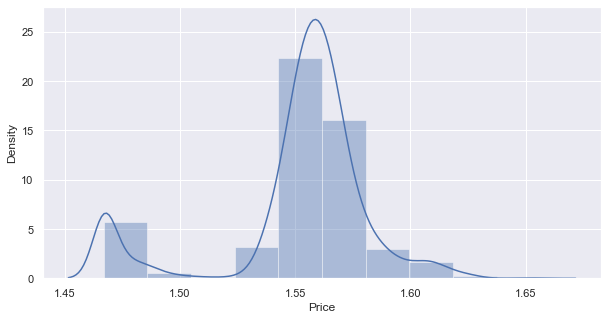

In [811]:
sns.distplot(df2['Price'], bins=10)
plt.plot()

In [812]:
df2['Popularity'].describe()

count    11199.000000
mean      1558.483347
std       1445.668872
min          2.000000
25%        549.000000
50%       1385.000000
75%       2009.000000
max       5657.000000
Name: Popularity, dtype: float64

In [813]:
df2.columns

Index(['Make', 'Model', 'Engine_Fuel_Type', 'Engine_HP', 'Engine_Cylinders',
       'Transmission_Type', 'Driven_Wheels', 'Number_of_Doors',
       'Market_Category', 'Vehicle_Size', 'Vehicle_Style', 'highway_MPG',
       'city_mpg', 'Popularity', 'Price', 'No_of_year'],
      dtype='object')

In [814]:
df2

Make          Model                Engine_Fuel_Type  Engine_HP  \
0          BMW  b'1 Series M'     premium unleaded (required)      335.0   
1          BMW    b'1 Series'     premium unleaded (required)      300.0   
2          BMW    b'1 Series'     premium unleaded (required)      300.0   
3          BMW    b'1 Series'     premium unleaded (required)      230.0   
4          BMW    b'1 Series'     premium unleaded (required)      230.0   
...        ...            ...                             ...        ...   
11909    Acura         b'ZDX'     premium unleaded (required)      300.0   
11910    Acura         b'ZDX'     premium unleaded (required)      300.0   
11911    Acura         b'ZDX'     premium unleaded (required)      300.0   
11912    Acura         b'ZDX'  premium unleaded (recommended)      300.0   
11913  Lincoln      b'Zephyr'                regular unleaded      221.0   

       Engine_Cylinders Transmission_Type      Driven_Wheels  Number_of_Doors  \
0                   6.0            MANUAL   rear wheel drive              2.0   
1                   6.0            MANUAL   rear wheel drive              2.0   
2                   6.0            MANUAL   rear wheel drive              2.0   
3                   6.0            MANUAL   rear wheel drive              2.0   
4                   6.0            MANUAL   rear wheel drive              2.0   
...                 ...               ...                ...              ...   
11909               6.0         AUTOMATIC    all wheel drive              4.0   
11910               6.0         AUTOMATIC    all wheel drive              4.0   
11911               6.0         AUTOMATIC    all wheel drive              4.0   
11912               6.0         AUTOMATIC    all wheel drive              4.0   
11913               6.0         AUTOMATIC  front wheel drive              4.0   

                             Market_Category Vehicle_Size  Vehicle_Style  \
0      Factory Tuner,Luxury,High-Performance      Compact          Coupe   
1                         Luxury,Performance      Compact    Convertible   
2                    Luxury,High-Performance      Compact          Coupe   
3                         Luxury,Performance      Compact          Coupe   
4                                     Luxury      Compact    Convertible   
...                                      ...          ...            ...   
11909             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11910             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11911             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11912             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11913                                 Luxury      Midsize          Sedan   

       highway_MPG  city_mpg  Popularity     Price  No_of_year  
0               26        19        3916  1.569378           9  
1               28        19        3916  1.565920           9  
2               28        20        3916  1.562828           9  
3               28        18        3916  1.556907           9  
4               28        18        3916  1.561371           9  
...            ...       ...         ...       ...         ...  
11909           23        16         204  1.569369           8  
11910           23        16         204  1.574901           8  
11911           23        16         204  1.571884           8  
11912           23        16         204  1.572042           7  
11913           26        17          61  1.556464          14  

[11199 rows x 16 columns]

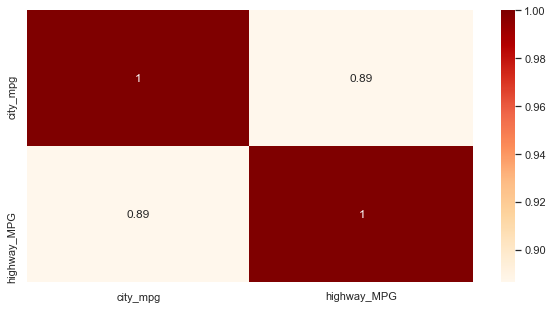

In [815]:
def heatmap(x,y,dataframe):
    sns.heatmap(dataframe.corr(),cmap="OrRd",annot=True)
    plt.show()
    
performance_col_list = ['city_mpg','highway_MPG']
heatmap(10,10,df2.filter(performance_col_list))

In [816]:
# both variable are highly corealted to each other, one of them will be drop

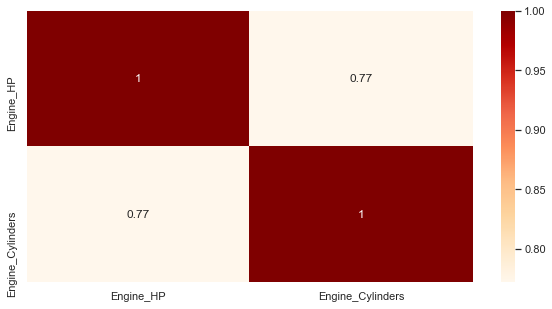

In [817]:
performance_col_list = ['Engine_HP','Engine_Cylinders']
heatmap(10,10,df2.filter(performance_col_list))

In [818]:
# both variable are highly corealted to each other, one of them will be drop

In [819]:
df2.drop(['Engine_Cylinders','highway_MPG'],axis=1,inplace=True)

In [820]:
df2.corr()

Engine_HP  Number_of_Doors  city_mpg  Popularity     Price  \
Engine_HP         1.000000        -0.106770 -0.396280    0.046568  0.640838   
Number_of_Doors  -0.106770         1.000000  0.121013   -0.057213  0.101425   
city_mpg         -0.396280         0.121013  1.000000   -0.000549 -0.039720   
Popularity        0.046568        -0.057213 -0.000549    1.000000  0.012131   
Price             0.640838         0.101425 -0.039720    0.012131  1.000000   
No_of_year       -0.351844        -0.247739 -0.188417   -0.085874 -0.766695   

                 No_of_year  
Engine_HP         -0.351844  
Number_of_Doors   -0.247739  
city_mpg          -0.188417  
Popularity        -0.085874  
Price             -0.766695  
No_of_year         1.000000

In [821]:
df2['Transmission_Type'].value_counts()

AUTOMATIC           7932
MANUAL              2634
AUTOMATED_MANUAL     553
DIRECT_DRIVE          68
UNKNOWN               12
Name: Transmission_Type, dtype: int64

### Checking R-squared by numbering different categories in columns

In [822]:
df4 = df2.copy()

In [823]:
#df['column name'] = df['column name'].replace(['1st old value','2nd old value',...],['1st new value','2nd new value',...])
df4['Transmission_Type'] = df4['Transmission_Type'].replace(['AUTOMATIC','MANUAL','AUTOMATED_MANUAL',
                                                            'DIRECT_DRIVE','UNKNOWN'],['1','2','3','4','0'])

In [824]:
df4['Transmission_Type'] = df4['Transmission_Type'].astype(int)

In [825]:
df4.describe()

Engine_HP  Transmission_Type  Number_of_Doors      city_mpg  \
count  11199.000000       11199.000000     11199.000000  11199.000000   
mean     249.453344           1.351103         3.454416     19.731851   
std       99.749881           0.604314         0.872804      9.177555   
min       55.000000           0.000000         2.000000      7.000000   
25%      171.000000           1.000000         2.000000     16.000000   
50%      237.000000           1.000000         4.000000     18.000000   
75%      303.000000           2.000000         4.000000     22.000000   
max      495.000000           4.000000         4.000000    137.000000   

         Popularity         Price    No_of_year  
count  11199.000000  11199.000000  11199.000000  
mean    1558.483347      1.551591      9.285472  
std     1445.668872      0.033025      7.228211  
min        2.000000      1.466944      3.000000  
25%      549.000000      1.547940      4.000000  
50%     1385.000000      1.558064      5.000000  
75%     2009.000000      1.567482     13.000000  
max     5657.000000      1.656347     30.000000

In [826]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11199 entries, 0 to 11913
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11199 non-null  object 
 1   Model              11199 non-null  |S80   
 2   Engine_Fuel_Type   11199 non-null  object 
 3   Engine_HP          11199 non-null  float64
 4   Transmission_Type  11199 non-null  int32  
 5   Driven_Wheels      11199 non-null  object 
 6   Number_of_Doors    11199 non-null  float64
 7   Market_Category    11199 non-null  object 
 8   Vehicle_Size       11199 non-null  object 
 9   Vehicle_Style      11199 non-null  object 
 10  city_mpg           11199 non-null  int64  
 11  Popularity         11199 non-null  int64  
 12  Price              11199 non-null  float64
 13  No_of_year         11199 non-null  int64  
dtypes: bytes640(1), float64(3), int32(1), int64(3), object(6)
memory usage: 2.3+ MB


In [827]:
df4['Driven_Wheels'].value_counts()

front wheel drive    4354
rear wheel drive     3212
all wheel drive      2308
four wheel drive     1325
Name: Driven_Wheels, dtype: int64

In [828]:
unique_vals = df4['Make'].unique()
df4['Make'].replace(to_replace=unique_vals,
           value= list(range(len(unique_vals))),
           inplace=True)

In [829]:
unique_vals = df4['Model'].unique()
df4['Model'].replace(to_replace=unique_vals,
           value= list(range(len(unique_vals))),
           inplace=True)

In [830]:
unique_vals = df4['Engine_Fuel_Type'].unique()
df4['Engine_Fuel_Type'].replace(to_replace=unique_vals,
           value= list(range(len(unique_vals))),
           inplace=True)

In [831]:
unique_vals = df4['Driven_Wheels'].unique()
df4['Driven_Wheels'].replace(to_replace=unique_vals,
           value= list(range(len(unique_vals))),
           inplace=True)

In [832]:
unique_vals = df4['Market_Category'].unique()
df4['Market_Category'].replace(to_replace=unique_vals,
           value= list(range(len(unique_vals))),
           inplace=True)

In [833]:
unique_vals = df4['Vehicle_Size'].unique()
df4['Vehicle_Size'].replace(to_replace=unique_vals,
           value= list(range(len(unique_vals))),
           inplace=True)

In [834]:
unique_vals = df4['Vehicle_Style'].unique()
df4['Vehicle_Style'].replace(to_replace=unique_vals,
           value= list(range(len(unique_vals))),
           inplace=True)

In [835]:
df4.corr()

Make     Model  Engine_Fuel_Type  Engine_HP  \
Make               1.000000  0.151499          0.124637   0.038726   
Model              0.151499  1.000000          0.052570   0.016338   
Engine_Fuel_Type   0.124637  0.052570          1.000000  -0.071562   
Engine_HP          0.038726  0.016338         -0.071562   1.000000   
Transmission_Type -0.016272 -0.103481          0.012543  -0.076717   
Driven_Wheels     -0.003113  0.125362          0.098382  -0.010442   
Number_of_Doors    0.007014  0.147375          0.096708  -0.106770   
Market_Category    0.080199  0.077832          0.128401   0.033569   
Vehicle_Size       0.070064  0.106896          0.149986   0.437896   
Vehicle_Style      0.020845  0.287573          0.207023  -0.100392   
city_mpg          -0.029179 -0.052069          0.231118  -0.396280   
Popularity        -0.237938 -0.089337          0.038580   0.046568   
Price              0.067391  0.045667          0.010376   0.640838   
No_of_year        -0.000583 -0.053810         -0.130700  -0.351844   

                   Transmission_Type  Driven_Wheels  Number_of_Doors  \
Make                       -0.016272      -0.003113         0.007014   
Model                      -0.103481       0.125362         0.147375   
Engine_Fuel_Type            0.012543       0.098382         0.096708   
Engine_HP                  -0.076717      -0.010442        -0.106770   
Transmission_Type           1.000000      -0.094253        -0.339086   
Driven_Wheels              -0.094253       1.000000         0.242850   
Number_of_Doors            -0.339086       0.242850         1.000000   
Market_Category            -0.085901       0.090148         0.155502   
Vehicle_Size               -0.360801       0.091508         0.240246   
Vehicle_Style              -0.202997       0.211931         0.165536   
city_mpg                    0.312780      -0.035570         0.121013   
Popularity                  0.042987      -0.005291        -0.057213   
Price                      -0.098310       0.060410         0.101425   
No_of_year                  0.121673      -0.098330        -0.247739   

                   Market_Category  Vehicle_Size  Vehicle_Style  city_mpg  \
Make                      0.080199      0.070064       0.020845 -0.029179   
Model                     0.077832      0.106896       0.287573 -0.052069   
Engine_Fuel_Type          0.128401      0.149986       0.207023  0.231118   
Engine_HP                 0.033569      0.437896      -0.100392 -0.396280   
Transmission_Type        -0.085901     -0.360801      -0.202997  0.312780   
Driven_Wheels             0.090148      0.091508       0.211931 -0.035570   
Number_of_Doors           0.155502      0.240246       0.165536  0.121013   
Market_Category           1.000000     -0.020984       0.067736  0.129582   
Vehicle_Size             -0.020984      1.000000       0.190304 -0.260000   
Vehicle_Style             0.067736      0.190304       1.000000 -0.177334   
city_mpg                  0.129582     -0.260000      -0.177334  1.000000   
Popularity               -0.008548      0.102040       0.175613 -0.000549   
Price                     0.179015      0.195479      -0.138724 -0.039720   
No_of_year               -0.161822     -0.100431       0.052187 -0.188417   

                   Popularity     Price  No_of_year  
Make                -0.237938  0.067391   -0.000583  
Model               -0.089337  0.045667   -0.053810  
Engine_Fuel_Type     0.038580  0.010376   -0.130700  
Engine_HP            0.046568  0.640838   -0.351844  
Transmission_Type    0.042987 -0.098310    0.121673  
Driven_Wheels       -0.005291  0.060410   -0.098330  
Number_of_Doors     -0.057213  0.101425   -0.247739  
Market_Category     -0.008548  0.179015   -0.161822  
Vehicle_Size         0.102040  0.195479   -0.100431  
Vehicle_Style        0.175613 -0.138724    0.052187  
city_mpg            -0.000549 -0.039720   -0.188417  
Popularity           1.000000  0.012131   -0.085874  
Price                0.012131  1.

In [836]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11199 entries, 0 to 11913
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11199 non-null  int64  
 1   Model              11199 non-null  int64  
 2   Engine_Fuel_Type   11199 non-null  int64  
 3   Engine_HP          11199 non-null  float64
 4   Transmission_Type  11199 non-null  int32  
 5   Driven_Wheels      11199 non-null  int64  
 6   Number_of_Doors    11199 non-null  float64
 7   Market_Category    11199 non-null  int64  
 8   Vehicle_Size       11199 non-null  int64  
 9   Vehicle_Style      11199 non-null  int64  
 10  city_mpg           11199 non-null  int64  
 11  Popularity         11199 non-null  int64  
 12  Price              11199 non-null  float64
 13  No_of_year         11199 non-null  int64  
dtypes: float64(3), int32(1), int64(10)
memory usage: 1.6 MB


In [837]:
df4.describe()

Make         Model  Engine_Fuel_Type     Engine_HP  \
count  11199.000000  11199.000000      11199.000000  11199.000000   
mean      20.176623    460.868113          1.221895    249.453344   
std       11.628940    270.606076          1.054574     99.749881   
min        0.000000      0.000000          0.000000     55.000000   
25%       11.000000    229.000000          1.000000    171.000000   
50%       22.000000    452.000000          1.000000    237.000000   
75%       28.000000    718.000000          1.000000    303.000000   
max       47.000000    914.000000          9.000000    495.000000   

       Transmission_Type  Driven_Wheels  Number_of_Doors  Market_Category  \
count       11199.000000   11199.000000     11199.000000     11199.000000   
mean            1.351103       1.155907         3.454416        12.331369   
std             0.604314       0.970533         0.872804        11.398477   
min             0.000000       0.000000         2.000000         0.000000   
25%             1.000000       0.000000         2.000000         5.000000   
50%             1.000000       1.000000         4.000000         7.000000   
75%             2.000000       2.000000         4.000000        18.000000   
max             4.000000       3.000000         4.000000        70.000000   

       Vehicle_Size  Vehicle_Style      city_mpg    Popularity         Price  \
count  11199.000000   11199.000000  11199.000000  11199.000000  11199.000000   
mean       0.847129       4.547460     19.731851   1558.483347      1.551591   
std        0.780196       3.494651      9.177555   1445.668872      0.033025   
min        0.000000       0.000000      7.000000      2.000000      1.466944   
25%        0.000000       2.000000     16.000000    549.000000      1.547940   
50%        1.000000       4.000000     18.000000   1385.000000      1.558064   
75%        1.000000       6.000000     22.000000   2009.000000      1.567482   
max        2.000000      15.000000    137.000000   5657.000000      1.656347   

         No_of_year  
count  11199.000000  
mean       9.285472  
std        7.228211  
min        3.000000  
25%        4.000000  
50%        5.000000  
75%       13.000000  
max       30.000000

In [838]:
df4.columns

Index(['Make', 'Model', 'Engine_Fuel_Type', 'Engine_HP', 'Transmission_Type',
       'Driven_Wheels', 'Number_of_Doors', 'Market_Category', 'Vehicle_Size',
       'Vehicle_Style', 'city_mpg', 'Popularity', 'Price', 'No_of_year'],
      dtype='object')

In [839]:
import statsmodels.api as sm 
X = df4[['Make', 'Model', 'Engine_Fuel_Type', 'Engine_HP', 'Transmission_Type',
       'Driven_Wheels', 'Number_of_Doors', 'Market_Category', 'Vehicle_Size',
       'Vehicle_Style', 'city_mpg', 'Popularity', 'No_of_year' ]]
Y = df4['Price']


X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()



print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     2736.
Date:                Tue, 05 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:01:23   Log-Likelihood:                 30313.
No. Observations:               11199   AIC:                        -6.060e+04
Df Residuals:                   11185   BIC:                        -6.050e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.5423      0.00

In [840]:
import statsmodels.api as sm 
X = df4[['Make', 'Model', 'Engine_Fuel_Type', 'Engine_HP',
       'Driven_Wheels','Market_Category', 'Vehicle_Size',
       'Vehicle_Style', 'Popularity', 'No_of_year' ]]
Y = df4['Price']


X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()



print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     3557.
Date:                Tue, 05 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:01:24   Log-Likelihood:                 30312.
No. Observations:               11199   AIC:                        -6.060e+04
Df Residuals:                   11188   BIC:                        -6.052e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.5418      0.001  

In [841]:
demand = df2['Make'].value_counts()

In [842]:
demand = demand.to_frame().reset_index()

In [843]:
demand =  demand.rename(columns = {'index':'Make','Make':'sales_demand'})

In [844]:
demand['sales_demand_range'] = ''

In [845]:
demand

Make  sales_demand sales_demand_range
0       Chevrolet          1083                   
1            Ford           825                   
2          Toyota           719                   
3      Volkswagen           568                   
4          Nissan           551                   
5           Dodge           529                   
6             GMC           482                   
7           Honda           433                   
8           Mazda           412                   
9        Cadillac           396                   
10         Suzuki           342                   
11  Mercedes-Benz           341                   
12       Infiniti           328                   
13            BMW           324                   
14           Audi           321                   
15          Volvo           266                   
16        Hyundai           259                   
17          Acura           246                   
18         Subaru           239                   
19            Kia           229                   
20     Mitsubishi           208                   
21          Lexus           202                   
22          Buick           190                   
23       Chrysler           187                   
24        Pontiac           181                   
25        Lincoln           160                   
26     Land Rover           139                   
27        Porsche           136                   
28     Oldsmobile           132                   
29           Saab           109                   
30   Aston Martin            91                   
31        Bentley            74                   
32       Plymouth            71                   
33        Ferrari            69                   
34           FIAT            62                   
35          Scion            60                   
36       Maserati            55                   
37    Lamborghini            52                   
38    Rolls-Royce            31                   
39          Lotus            28                   
40          Tesla            18                   
41         HUMMER            17                   
42        Maybach            16                   
43     Alfa Romeo             5                   
44        McLaren             5                   
45        Bugatti             3                   
46        Genesis             3                   
47         Spyker             2

In [846]:
demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Make                48 non-null     object
 1   sales_demand        48 non-null     int64 
 2   sales_demand_range  48 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.2+ KB


In [847]:
demand['sales_demand_range'] = np.where((demand['sales_demand'] >= 800), 'high',
                                        np.where((demand['sales_demand'] < 800) & (demand['sales_demand'] >= 450),'good',
                                                np.where((demand['sales_demand'] < 450) & (demand['sales_demand'] >= 200),'medium',
                                                        np.where((demand['sales_demand'] < 200) & (demand['sales_demand'] >= 60),'bad',
                                                                np.where((demand['sales_demand'] < 60),'less','')))))

In [848]:
demand

Make  sales_demand sales_demand_range
0       Chevrolet          1083               high
1            Ford           825               high
2          Toyota           719               good
3      Volkswagen           568               good
4          Nissan           551               good
5           Dodge           529               good
6             GMC           482               good
7           Honda           433             medium
8           Mazda           412             medium
9        Cadillac           396             medium
10         Suzuki           342             medium
11  Mercedes-Benz           341             medium
12       Infiniti           328             medium
13            BMW           324             medium
14           Audi           321             medium
15          Volvo           266             medium
16        Hyundai           259             medium
17          Acura           246             medium
18         Subaru           239             medium
19            Kia           229             medium
20     Mitsubishi           208             medium
21          Lexus           202             medium
22          Buick           190                bad
23       Chrysler           187                bad
24        Pontiac           181                bad
25        Lincoln           160                bad
26     Land Rover           139                bad
27        Porsche           136                bad
28     Oldsmobile           132                bad
29           Saab           109                bad
30   Aston Martin            91                bad
31        Bentley            74                bad
32       Plymouth            71                bad
33        Ferrari            69                bad
34           FIAT            62                bad
35          Scion            60                bad
36       Maserati            55               less
37    Lamborghini            52               less
38    Rolls-Royce            31               less
39          Lotus            28               less
40          Tesla            18               less
41         HUMMER            17               less
42        Maybach            16               less
43     Alfa Romeo             5               less
44        McLaren             5               less
45        Bugatti             3               less
46        Genesis             3               less
47         Spyker             2               less

In [849]:
demand = demand.drop(columns = ['sales_demand'])

In [850]:
df2 = pd.merge(df2, demand, on = "Make")

In [851]:
df2

Make           Model             Engine_Fuel_Type  Engine_HP  \
0          BMW   b'1 Series M'  premium unleaded (required)      335.0   
1          BMW     b'1 Series'  premium unleaded (required)      300.0   
2          BMW     b'1 Series'  premium unleaded (required)      300.0   
3          BMW     b'1 Series'  premium unleaded (required)      230.0   
4          BMW     b'1 Series'  premium unleaded (required)      230.0   
...        ...             ...                          ...        ...   
11194    Tesla      b'Model S'                     electric      150.0   
11195    Tesla      b'Model S'                     electric      150.0   
11196  Bugatti  b'Veyron 16.4'  premium unleaded (required)      495.0   
11197  Bugatti  b'Veyron 16.4'  premium unleaded (required)      495.0   
11198  Bugatti  b'Veyron 16.4'  premium unleaded (required)      495.0   

      Transmission_Type     Driven_Wheels  Number_of_Doors  \
0                MANUAL  rear wheel drive              2.0   
1                MANUAL  rear wheel drive              2.0   
2                MANUAL  rear wheel drive              2.0   
3                MANUAL  rear wheel drive              2.0   
4                MANUAL  rear wheel drive              2.0   
...                 ...               ...              ...   
11194      DIRECT_DRIVE   all wheel drive              4.0   
11195      DIRECT_DRIVE  rear wheel drive              4.0   
11196  AUTOMATED_MANUAL   all wheel drive              2.0   
11197  AUTOMATED_MANUAL   all wheel drive              2.0   
11198  AUTOMATED_MANUAL   all wheel drive              2.0   

                             Market_Category Vehicle_Size Vehicle_Style  \
0      Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                         Luxury,Performance      Compact   Convertible   
2                    Luxury,High-Performance      Compact         Coupe   
3                         Luxury,Performance      Compact         Coupe   
4                                     Luxury      Compact   Convertible   
...                                      ...          ...           ...   
11194                Exotic,High-Performance        Large         Sedan   
11195                     Exotic,Performance        Large         Sedan   
11196                Exotic,High-Performance      Compact         Coupe   
11197                Exotic,High-Performance      Compact         Coupe   
11198                Exotic,High-Performance      Compact         Coupe   

       city_mpg  Popularity     Price  No_of_year sales_demand_range  
0            19        3916  1.569378           9             medium  
1            19        3916  1.565920           9             medium  
2            20        3916  1.562828           9             medium  
3            18        3916  1.556907           9             medium  
4            18        3916  1.561371           9             medium  
...         ...         ...       ...         ...                ...  
11194        91        1391  1.592413           4               less  
11195        88        1391  1.580457           4               less  
11196         8         820  1.656347          12               less  
11197         8         820  1.650053          12               less  
11198         8         820  1.652599          11               less  

[11199 rows x 15 columns]

In [852]:
df2['Popularity'].describe()

count    11199.000000
mean      1558.483347
std       1445.668872
min          2.000000
25%        549.000000
50%       1385.000000
75%       2009.000000
max       5657.000000
Name: Popularity, dtype: float64

In [853]:
df2['popularity_range'] = np.where((df4['Popularity'] >= 3000), 'high',
                                        np.where((df4['Popularity'] < 3000) & (df4['Popularity'] >= 1000),'medium',
                                                np.where((df4['Popularity'] < 1000) ,'low','')))

In [854]:
market_cat = df2['Market_Category'].value_counts()

In [855]:
market_cat = market_cat.to_frame().reset_index()

In [856]:
market_cat = market_cat.rename(columns = {'index':'Market_Category', 'Market_Category':'count'})

In [857]:
market_cat

Market_Category  count
0                                         Crossover   2145
1                                         Hatchback   2071
2                                         Flex Fuel   1664
3                                            Luxury    819
4                                Luxury,Performance    659
..                                              ...    ...
66                               Performance,Hybrid      1
67         Crossover,Exotic,Luxury,High-Performance      1
68  Flex Fuel,Factory Tuner,Luxury,High-Performance      1
69              Crossover,Exotic,Luxury,Performance      1
70            Exotic,Luxury,High-Performance,Hybrid      1

[71 rows x 2 columns]

In [858]:
market_cat['num_of_feature'] = market_cat['Market_Category'].str.count(',') + 1

In [859]:
market_cat = market_cat.drop(columns = ['count'])

In [860]:
df2 = pd.merge(df2, market_cat, on = "Market_Category")

In [861]:
df2['condition'] = np.where((df2['No_of_year'] >= 25), 'vintage',
                                np.where((df2['No_of_year'] >= 15) & (df2['No_of_year'] < 25),'notfit',
                                         np.where((df2['No_of_year'] >= 5) & (df2['No_of_year'] < 15) ,'old',
                                                  np.where((df2['No_of_year'] < 5) ,'new',''))))

In [862]:
df2['condition'].value_counts()

old        5074
new        3698
notfit     1714
vintage     713
Name: condition, dtype: int64

In [863]:
df2.head()

Make          Model             Engine_Fuel_Type  Engine_HP  \
0  BMW  b'1 Series M'  premium unleaded (required)      335.0   
1  BMW    b'2 Series'  premium unleaded (required)      320.0   
2  BMW    b'2 Series'  premium unleaded (required)      320.0   
3  BMW    b'2 Series'  premium unleaded (required)      320.0   
4  BMW    b'2 Series'  premium unleaded (required)      320.0   

  Transmission_Type     Driven_Wheels  Number_of_Doors  \
0            MANUAL  rear wheel drive              2.0   
1         AUTOMATIC  rear wheel drive              2.0   
2         AUTOMATIC  rear wheel drive              2.0   
3         AUTOMATIC   all wheel drive              2.0   
4         AUTOMATIC  rear wheel drive              2.0   

                         Market_Category Vehicle_Size Vehicle_Style  city_mpg  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe        19   
1  Factory Tuner,Luxury,High-Performance      Compact   Convertible        20   
2  Factory Tuner,Luxury,High-Performance      Compact         Coupe        20   
3  Factory Tuner,Luxury,High-Performance      Compact         Coupe        20   
4  Factory Tuner,Luxury,High-Performance      Compact   Convertible        20   

   Popularity     Price  No_of_year sales_demand_range popularity_range  \
0        3916  1.569378           9             medium             high   
1        3916  1.570870           4             medium             high   
2        3916  1.568181           4             medium             high   
3        3916  1.569387           4             medium             high   
4        3916  1.571953           4             medium             high   

   num_of_feature condition  
0               3       old  
1               3       new  
2               3       new  
3               3       new  
4               3       new

In [864]:
df2['Vehicle_Style'] = df2['Vehicle_Style'].replace(['Passenger Van', 'Cargo_Van','Cargo_Minivan','Passenger_Minivan'], 'Van')
df2['Vehicle_Style'] = df2['Vehicle_Style'].replace(['Convertible SUV', '2dr SUV','4dr SUV'], 'SUV')
df2['Vehicle_Style'] = df2['Vehicle_Style'].replace(['Regular Cab Pickup', 'Extended Cab Pickup','Crew Cab Pickup'], 'Cab')
df2['Vehicle_Style'] = df2['Vehicle_Style'].replace(['2dr Hatchback', '4dr Hatchback'], 'Hatchback')

In [865]:
df2['Vehicle_Style'].value_counts()

Sedan                2843
SUV                  2553
Cab                  1597
Coupe                1175
Hatchback            1075
Convertible           741
Wagon                 562
Passenger Minivan     389
Van                   121
Cargo Van              84
Cargo Minivan          59
Name: Vehicle_Style, dtype: int64

In [866]:
df2['Engine_Fuel_Type'] = df2['Engine_Fuel_Type'].replace(['natural gas', 'flex-fuel (unleaded/natural gas)'], 'Natural')
df2['Engine_Fuel_Type'] = df2['Engine_Fuel_Type'].replace(['premium unleaded (required)', 'flex-fuel (premium unleaded required/E85)'], 'unleaded required')
df2['Engine_Fuel_Type'] = df2['Engine_Fuel_Type'].replace(['premium unleaded (recommended)', 'flex-fuel (premium unleaded recommended/E85)'], 'unleaded recommended')
df2['Engine_Fuel_Type'] = df2['Engine_Fuel_Type'].replace(['regular unleaded','flex-fuel (unleaded/E85)'], 'unleaded')

In [867]:
df2['Engine_Fuel_Type'].value_counts()

unleaded                7548
unleaded required       2009
unleaded recommended    1418
diesel                   150
electric                  66
Natural                    8
Name: Engine_Fuel_Type, dtype: int64

In [868]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11199 entries, 0 to 11198
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                11199 non-null  object 
 1   Model               11199 non-null  |S80   
 2   Engine_Fuel_Type    11199 non-null  object 
 3   Engine_HP           11199 non-null  float64
 4   Transmission_Type   11199 non-null  object 
 5   Driven_Wheels       11199 non-null  object 
 6   Number_of_Doors     11199 non-null  float64
 7   Market_Category     11199 non-null  object 
 8   Vehicle_Size        11199 non-null  object 
 9   Vehicle_Style       11199 non-null  object 
 10  city_mpg            11199 non-null  int64  
 11  Popularity          11199 non-null  int64  
 12  Price               11199 non-null  float64
 13  No_of_year          11199 non-null  int64  
 14  sales_demand_range  11199 non-null  object 
 15  popularity_range    11199 non-null  object 
 16  num_

In [869]:
df2=df2.drop(columns=["Model"], axis=1)
df2.head()
##drop Model column from df2 as this column contains lot of unique variables which will create problem at time
##of creation of dummy variables(lot of dummies will be created for this column)

Make   Engine_Fuel_Type  Engine_HP Transmission_Type     Driven_Wheels  \
0  BMW  unleaded required      335.0            MANUAL  rear wheel drive   
1  BMW  unleaded required      320.0         AUTOMATIC  rear wheel drive   
2  BMW  unleaded required      320.0         AUTOMATIC  rear wheel drive   
3  BMW  unleaded required      320.0         AUTOMATIC   all wheel drive   
4  BMW  unleaded required      320.0         AUTOMATIC  rear wheel drive   

   Number_of_Doors                        Market_Category Vehicle_Size  \
0              2.0  Factory Tuner,Luxury,High-Performance      Compact   
1              2.0  Factory Tuner,Luxury,High-Performance      Compact   
2              2.0  Factory Tuner,Luxury,High-Performance      Compact   
3              2.0  Factory Tuner,Luxury,High-Performance      Compact   
4              2.0  Factory Tuner,Luxury,High-Performance      Compact   

  Vehicle_Style  city_mpg  Popularity     Price  No_of_year  \
0         Coupe        19        3916  1.569378           9   
1   Convertible        20        3916  1.570870           4   
2         Coupe        20        3916  1.568181           4   
3         Coupe        20        3916  1.569387           4   
4   Convertible        20        3916  1.571953           4   

  sales_demand_range popularity_range  num_of_feature condition  
0             medium             high               3       old  
1             medium             high               3       new  
2             medium             high               3       new  
3             medium             high               3       new  
4             medium             high               3       new

In [870]:
df2['Number_of_Doors'] = df2['Number_of_Doors'].astype(int)

In [871]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()
col_to_scale = ['Engine_HP','city_mpg','Popularity','num_of_feature','No_of_year']
df2[col_to_scale] = min_max.fit_transform(df2[col_to_scale])
df2.head()

Make   Engine_Fuel_Type  Engine_HP Transmission_Type     Driven_Wheels  \
0  BMW  unleaded required   0.636364            MANUAL  rear wheel drive   
1  BMW  unleaded required   0.602273         AUTOMATIC  rear wheel drive   
2  BMW  unleaded required   0.602273         AUTOMATIC  rear wheel drive   
3  BMW  unleaded required   0.602273         AUTOMATIC   all wheel drive   
4  BMW  unleaded required   0.602273         AUTOMATIC  rear wheel drive   

   Number_of_Doors                        Market_Category Vehicle_Size  \
0                2  Factory Tuner,Luxury,High-Performance      Compact   
1                2  Factory Tuner,Luxury,High-Performance      Compact   
2                2  Factory Tuner,Luxury,High-Performance      Compact   
3                2  Factory Tuner,Luxury,High-Performance      Compact   
4                2  Factory Tuner,Luxury,High-Performance      Compact   

  Vehicle_Style  city_mpg  Popularity     Price  No_of_year  \
0         Coupe  0.092308    0.692131  1.569378    0.222222   
1   Convertible  0.100000    0.692131  1.570870    0.037037   
2         Coupe  0.100000    0.692131  1.568181    0.037037   
3         Coupe  0.100000    0.692131  1.569387    0.037037   
4   Convertible  0.100000    0.692131  1.571953    0.037037   

  sales_demand_range popularity_range  num_of_feature condition  
0             medium             high             0.5       old  
1             medium             high             0.5       new  
2             medium             high             0.5       new  
3             medium             high             0.5       new  
4             medium             high             0.5       new

In [872]:
df4= df2['Market_Category'].str.join(sep='').str.get_dummies(sep=',')

In [873]:
df2 = pd.merge(df2, df4, left_index = True, right_index = True)

In [874]:
df4

Crossover  Diesel  Exotic  Factory Tuner  Flex Fuel  Hatchback  \
0              0       0       0              1          0          0   
1              0       0       0              1          0          0   
2              0       0       0              1          0          0   
3              0       0       0              1          0          0   
4              0       0       0              1          0          0   
...          ...     ...     ...            ...        ...        ...   
11194          0       0       1              0          0          0   
11195          0       0       1              0          0          0   
11196          0       0       1              0          0          0   
11197          0       0       1              0          0          0   
11198          0       0       1              0          0          0   

       High-Performance  Hybrid  Luxury  Performance  
0                     1       0       1            0  
1                     1       0       1            0  
2                     1       0       1            0  
3                     1       0       1            0  
4                     1       0       1            0  
...                 ...     ...     ...          ...  
11194                 0       0       0            1  
11195                 0       0       0            1  
11196                 0       0       0            1  
11197                 0       0       0            1  
11198                 0       0       0            1  

[11199 rows x 10 columns]

In [875]:
df2=df2.drop(columns=['Market_Category'],axis=1)

In [876]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11199 entries, 0 to 11198
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                11199 non-null  object 
 1   Engine_Fuel_Type    11199 non-null  object 
 2   Engine_HP           11199 non-null  float64
 3   Transmission_Type   11199 non-null  object 
 4   Driven_Wheels       11199 non-null  object 
 5   Number_of_Doors     11199 non-null  int32  
 6   Vehicle_Size        11199 non-null  object 
 7   Vehicle_Style       11199 non-null  object 
 8   city_mpg            11199 non-null  float64
 9   Popularity          11199 non-null  float64
 10  Price               11199 non-null  float64
 11  No_of_year          11199 non-null  float64
 12  sales_demand_range  11199 non-null  object 
 13  popularity_range    11199 non-null  object 
 14  num_of_feature      11199 non-null  float64
 15  condition           11199 non-null  object 
 16  Cros

In [877]:
## Convert categorical variables to dummies
df2= pd.get_dummies(data=df2, columns = ['Make','Engine_Fuel_Type', 'Transmission_Type', 'Driven_Wheels', 'Vehicle_Size',
                                         'Vehicle_Style','sales_demand_range','popularity_range','Number_of_Doors','condition'], \
                                   prefix = ['Make','Engine_Fuel_Type', 'Transmission_Type', 'Driven_Wheels', 'Vehicle_Size',
                                             'Vehicle_Style','sales_demand_range','popularity_range','Number_of_Doors','condition'], 
                                   drop_first=True)
df2.head()

Engine_HP  city_mpg  Popularity     Price  No_of_year  num_of_feature  \
0   0.636364  0.092308    0.692131  1.569378    0.222222             0.5   
1   0.602273  0.100000    0.692131  1.570870    0.037037             0.5   
2   0.602273  0.100000    0.692131  1.568181    0.037037             0.5   
3   0.602273  0.100000    0.692131  1.569387    0.037037             0.5   
4   0.602273  0.100000    0.692131  1.571953    0.037037             0.5   

   Crossover  Diesel  Exotic  Factory Tuner  ...  sales_demand_range_high  \
0          0       0       0              1  ...                        0   
1          0       0       0              1  ...                        0   
2          0       0       0              1  ...                        0   
3          0       0       0              1  ...                        0   
4          0       0       0              1  ...                        0   

   sales_demand_range_less  sales_demand_range_medium  popularity_range_low  \
0                        0                          1                     0   
1                        0                          1                     0   
2                        0                          1                     0   
3                        0                          1                     0   
4                        0                          1                     0   

   popularity_range_medium  Number_of_Doors_3  Number_of_Doors_4  \
0                        0                  0                  0   
1                        0                  0                  0   
2                        0                  0                  0   
3                        0                  0                  0   
4                        0                  0                  0   

   condition_notfit  condition_old  condition_vintage  
0                 0              1                  0  
1                 0              0                  0  
2                 0              0                  0  
3                 0              0                  0  
4                 0              0                  0  

[5 rows x 98 columns]

In [878]:
len(df2.columns)

98

In [882]:
df2.describe().T

count      mean       std       min       25%       50%  \
Engine_HP          11199.0  0.441939  0.226704  0.000000  0.263636  0.413636   
city_mpg           11199.0  0.097937  0.070597  0.000000  0.069231  0.084615   
Popularity         11199.0  0.275240  0.255644  0.000000  0.096729  0.244562   
Price              11199.0  1.551591  0.033025  1.466944  1.547940  1.558064   
No_of_year         11199.0  0.232795  0.267712  0.000000  0.037037  0.074074   
...                    ...       ...       ...       ...       ...       ...   
Number_of_Doors_3  11199.0  0.031789  0.175445  0.000000  0.000000  0.000000   
Number_of_Doors_4  11199.0  0.711314  0.453172  0.000000  0.000000  1.000000   
condition_notfit   11199.0  0.153049  0.360051  0.000000  0.000000  0.000000   
condition_old      11199.0  0.453076  0.497816  0.000000  0.000000  0.000000   
condition_vintage  11199.0  0.063666  0.244169  0.000000  0.000000  0.000000   

                        75%       max  
Engine_HP          0.563636  1.000000  
city_mpg           0.115385  1.000000  
Popularity         0.354907  1.000000  
Price              1.567482  1.656347  
No_of_year         0.370370  1.000000  
...                     ...       ...  
Number_of_Doors_3  0.000000  1.000000  
Number_of_Doors_4  1.000000  1.000000  
condition_notfit   0.000000  1.000000  
condition_old      1.000000  1.000000  
condition_vintage  0.000000  1.000000  

[98 rows x 8 columns]

In [883]:
corr_data=df2.corr()

In [884]:
corr_data

Engine_HP  city_mpg  Popularity     Price  No_of_year  \
Engine_HP           1.000000 -0.396280    0.046568  0.640838   -0.351844   
city_mpg           -0.396280  1.000000   -0.000549 -0.039720   -0.188417   
Popularity          0.046568 -0.000549    1.000000  0.012131   -0.085874   
Price               0.640838 -0.039720    0.012131  1.000000   -0.766695   
No_of_year         -0.351844 -0.188417   -0.085874 -0.766695    1.000000   
...                      ...       ...         ...       ...         ...   
Number_of_Doors_3  -0.067139 -0.111230    0.163677 -0.139698    0.127907   
Number_of_Doors_4  -0.089822  0.138066   -0.086779  0.124714   -0.263330   
condition_notfit   -0.217922 -0.132245   -0.025940 -0.338759    0.563760   
condition_old       0.131728 -0.007846   -0.071309  0.309820   -0.200787   
condition_vintage  -0.244288 -0.055226   -0.039577 -0.646451    0.649254   

                   num_of_feature  Crossover    Diesel    Exotic  \
Engine_HP                0.530024  -0.148671 -0.053769  0.418512   
city_mpg                -0.084787  -0.004243  0.057185 -0.102427   
Popularity              -0.062104  -0.022812  0.058510 -0.095700   
Price                    0.388929   0.038018  0.035931  0.348795   
No_of_year              -0.170410  -0.104687 -0.062349 -0.027705   
...                           ...        ...       ...       ...   
Number_of_Doors_3       -0.090908  -0.050692  0.090175 -0.038800   
Number_of_Doors_4       -0.080124   0.298594  0.010830 -0.231224   
condition_notfit        -0.110868  -0.016658 -0.057614 -0.001390   
condition_old            0.093349  -0.003310  0.030298  0.085455   
condition_vintage       -0.099452  -0.100965 -0.010609 -0.055838   

                   Factory Tuner  ...  sales_demand_range_high  \
Engine_HP               0.335034  ...                -0.012225   
city_mpg               -0.090050  ...                -0.056429   
Popularity              0.029419  ...                 0.524666   
Price                   0.149235  ...                -0.066616   
No_of_year             -0.041342  ...                 0.020778   
...                          ...  ...                      ...   
Number_of_Doors_3      -0.043452  ...                 0.188651   
Number_of_Doors_4      -0.128771  ...                -0.073475   
condition_notfit       -0.027569  ...                 0.093003   
condition_old           0.019836  ...                -0.052707   
condition_vintage      -0.033502  ...                -0.056883   

                   sales_demand_range_less  sales_demand_range_medium  \
Engine_HP                         0.210730                  -0.037039   
city_mpg                         -0.002782                   0.078245   
Popularity                       -0.103264                  -0.145987   
Price                             0.212672                   0.032463   
No_of_year                       -0.031899                  -0.055290   
...                                    ...                        ...   
Number_of_Doors_3                -0.026528                  -0.128015   
Number_of_Doors_4                -0.100578                   0.137782   
condition_notfit                 -0.027628                  -0.066546   
condition_old                     0.068241                   0.035548   
condition_vintage                -0.038176                  -0.008511   

                   popularity_range_low  popularity_range_medium  \
Engine_HP                      0.043091                -0.088082   
city_mpg                      -0.073678                 0.082112   
Popularity                     0.130745                -0.089724   
Price                         -0.024949                 0.003975   
No_of_year                     0.056869                -0.031619   
...                                 ...                      ...   
Number_of_Doors_3              0.053067                -0.070386   
Number_of_Doors_4             -0.022145                 0.043401   
conditi

In [885]:
high_corr_data=df2.corr()
high_corr_features=high_corr_data.index[abs(high_corr_data['Price'])>=0.15]

In [939]:
high_corr_data

Engine_HP  city_mpg  Popularity     Price  No_of_year  \
Engine_HP           1.000000 -0.396280    0.046568  0.640838   -0.351844   
city_mpg           -0.396280  1.000000   -0.000549 -0.039720   -0.188417   
Popularity          0.046568 -0.000549    1.000000  0.012131   -0.085874   
Price               0.640838 -0.039720    0.012131  1.000000   -0.766695   
No_of_year         -0.351844 -0.188417   -0.085874 -0.766695    1.000000   
...                      ...       ...         ...       ...         ...   
Number_of_Doors_3  -0.067139 -0.111230    0.163677 -0.139698    0.127907   
Number_of_Doors_4  -0.089822  0.138066   -0.086779  0.124714   -0.263330   
condition_notfit   -0.217922 -0.132245   -0.025940 -0.338759    0.563760   
condition_old       0.131728 -0.007846   -0.071309  0.309820   -0.200787   
condition_vintage  -0.244288 -0.055226   -0.039577 -0.646451    0.649254   

                   num_of_feature  Crossover    Diesel    Exotic  \
Engine_HP                0.530024  -0.148671 -0.053769  0.418512   
city_mpg                -0.084787  -0.004243  0.057185 -0.102427   
Popularity              -0.062104  -0.022812  0.058510 -0.095700   
Price                    0.388929   0.038018  0.035931  0.348795   
No_of_year              -0.170410  -0.104687 -0.062349 -0.027705   
...                           ...        ...       ...       ...   
Number_of_Doors_3       -0.090908  -0.050692  0.090175 -0.038800   
Number_of_Doors_4       -0.080124   0.298594  0.010830 -0.231224   
condition_notfit        -0.110868  -0.016658 -0.057614 -0.001390   
condition_old            0.093349  -0.003310  0.030298  0.085455   
condition_vintage       -0.099452  -0.100965 -0.010609 -0.055838   

                   Factory Tuner  ...  sales_demand_range_high  \
Engine_HP               0.335034  ...                -0.012225   
city_mpg               -0.090050  ...                -0.056429   
Popularity              0.029419  ...                 0.524666   
Price                   0.149235  ...                -0.066616   
No_of_year             -0.041342  ...                 0.020778   
...                          ...  ...                      ...   
Number_of_Doors_3      -0.043452  ...                 0.188651   
Number_of_Doors_4      -0.128771  ...                -0.073475   
condition_notfit       -0.027569  ...                 0.093003   
condition_old           0.019836  ...                -0.052707   
condition_vintage      -0.033502  ...                -0.056883   

                   sales_demand_range_less  sales_demand_range_medium  \
Engine_HP                         0.210730                  -0.037039   
city_mpg                         -0.002782                   0.078245   
Popularity                       -0.103264                  -0.145987   
Price                             0.212672                   0.032463   
No_of_year                       -0.031899                  -0.055290   
...                                    ...                        ...   
Number_of_Doors_3                -0.026528                  -0.128015   
Number_of_Doors_4                -0.100578                   0.137782   
condition_notfit                 -0.027628                  -0.066546   
condition_old                     0.068241                   0.035548   
condition_vintage                -0.038176                  -0.008511   

                   popularity_range_low  popularity_range_medium  \
Engine_HP                      0.043091                -0.088082   
city_mpg                      -0.073678                 0.082112   
Popularity                     0.130745                -0.089724   
Price                         -0.024949                 0.003975   
No_of_year                     0.056869                -0.031619   
...                                 ...                      ...   
Number_of_Doors_3              0.053067                -0.070386   
Number_of_Doors_4             -0.022145                 0.043401   
conditi

In [886]:
high_corr_features

Index(['Engine_HP', 'Price', 'No_of_year', 'num_of_feature', 'Exotic',
       'Hatchback', 'High-Performance', 'Luxury', 'Make_Oldsmobile',
       'Make_Plymouth', 'Engine_Fuel_Type_unleaded',
       'Engine_Fuel_Type_unleaded recommended',
       'Engine_Fuel_Type_unleaded required', 'Transmission_Type_AUTOMATIC',
       'Transmission_Type_MANUAL', 'Driven_Wheels_front wheel drive',
       'Vehicle_Style_Hatchback', 'sales_demand_range_less',
       'condition_notfit', 'condition_old', 'condition_vintage'],
      dtype='object')

In [887]:
len(high_corr_features)

21

In [888]:
df2.columns

Index(['Engine_HP', 'city_mpg', 'Popularity', 'Price', 'No_of_year',
       'num_of_feature', 'Crossover', 'Diesel', 'Exotic', 'Factory Tuner',
       'Flex Fuel', 'Hatchback', 'High-Performance', 'Hybrid', 'Luxury',
       'Performance', 'Make_Alfa Romeo', 'Make_Aston Martin', 'Make_Audi',
       'Make_BMW', 'Make_Bentley', 'Make_Bugatti', 'Make_Buick',
       'Make_Cadillac', 'Make_Chevrolet', 'Make_Chrysler', 'Make_Dodge',
       'Make_FIAT', 'Make_Ferrari', 'Make_Ford', 'Make_GMC', 'Make_Genesis',
       'Make_HUMMER', 'Make_Honda', 'Make_Hyundai', 'Make_Infiniti',
       'Make_Kia', 'Make_Lamborghini', 'Make_Land Rover', 'Make_Lexus',
       'Make_Lincoln', 'Make_Lotus', 'Make_Maserati', 'Make_Maybach',
       'Make_Mazda', 'Make_McLaren', 'Make_Mercedes-Benz', 'Make_Mitsubishi',
       'Make_Nissan', 'Make_Oldsmobile', 'Make_Plymouth', 'Make_Pontiac',
       'Make_Porsche', 'Make_Rolls-Royce', 'Make_Saab', 'Make_Scion',
       'Make_Spyker', 'Make_Subaru', 'Make_Suzuki', 'Make_Te

In [897]:
import statsmodels.api as sm 
X = df2[[#'Engine_HP' 'city_mpg',
    'num_of_feature', 'No_of_year', #'Exotic',
       'Factory Tuner', 'Hatchback', 'High-Performance', 'Luxury',
       'Make_Aston Martin', 'Make_Bentley', 'Make_Bugatti', 'Make_Ferrari',
       'Make_Lamborghini', 'Make_Maybach', 'Make_Rolls-Royce',
       'Engine_Fuel_Type_unleaded', 'Engine_Fuel_Type_unleaded required',
       'Driven_Wheels_front wheel drive', 'Driven_Wheels_rear wheel drive',
       'Vehicle_Style_Convertible', 'Vehicle_Style_Coupe',
       'sales_demand_range_less', 'condition_vintage']]
Y = df2['Price']


X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     2173.
Date:                Tue, 05 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:22:36   Log-Likelihood:                 31408.
No. Observations:               11199   AIC:                        -6.277e+04
Df Residuals:                   11177   BIC:                        -6.261e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [898]:
Pred_sale=model.predict(X)

In [899]:
from sklearn import metrics # use to evaluate the model 

In [900]:
print('Mean Absolute Error :', metrics.mean_absolute_error(Y, Pred_sale))  
print('Mean Squared Error :', metrics.mean_squared_error(Y, Pred_sale))  
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(Y, Pred_sale)))

Mean Absolute Error : 0.010492541912043685
Mean Squared Error : 0.0002145703464131745
Root Mean Squared Error : 0.014648219905953573


In [901]:
X_copy=X.copy()

In [902]:
X_copy["Pred_sale"]=Pred_sale
X_copy["Actual_Sale"]=Y
#X_copy.to_excel("X_Pred1.xlsx")

In [903]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif['vif_value'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values('vif_value', ascending=False)

vif_value                            features
0   12.503053                               const
1    2.931976                      num_of_feature
15   2.369464  Engine_Fuel_Type_unleaded required
14   2.328349           Engine_Fuel_Type_unleaded
6    2.288041                              Luxury
5    2.239068                    High-Performance
20   1.963708             sales_demand_range_less
2    1.956929                          No_of_year
21   1.769801                   condition_vintage
3    1.753286                       Factory Tuner
16   1.585096     Driven_Wheels_front wheel drive
17   1.560275      Driven_Wheels_rear wheel drive
11   1.431135                    Make_Lamborghini
19   1.321426                 Vehicle_Style_Coupe
4    1.280161                           Hatchback
13   1.265177                    Make_Rolls-Royce
18   1.240958           Vehicle_Style_Convertible
7    1.189459                   Make_Aston Martin
10   1.163181                        Make_Ferrari
8    1.133561                        Make_Bentley
12   1.129383                        Make_Maybach
9    1.027240                        Make_Bugatti

In [904]:
X_copy

const  num_of_feature  No_of_year  Factory Tuner  Hatchback  \
0        1.0            0.50    0.222222              1          0   
1        1.0            0.50    0.037037              1          0   
2        1.0            0.50    0.037037              1          0   
3        1.0            0.50    0.037037              1          0   
4        1.0            0.50    0.037037              1          0   
...      ...             ...         ...            ...        ...   
11194    1.0            0.25    0.037037              0          0   
11195    1.0            0.25    0.037037              0          0   
11196    1.0            0.25    0.037037              0          0   
11197    1.0            0.25    0.037037              0          0   
11198    1.0            0.25    0.037037              0          0   

       High-Performance  Luxury  Make_Aston Martin  Make_Bentley  \
0                     1       1                  0             0   
1                     1       1                  0             0   
2                     1       1                  0             0   
3                     1       1                  0             0   
4                     1       1                  0             0   
...                 ...     ...                ...           ...   
11194                 0       0                  0             0   
11195                 0       0                  0             0   
11196                 0       0                  0             0   
11197                 0       0                  0             0   
11198                 0       0                  0             0   

       Make_Bugatti  ...  Engine_Fuel_Type_unleaded  \
0                 0  ...                          0   
1                 0  ...                          0   
2                 0  ...                          0   
3                 0  ...                          0   
4                 0  ...                          0   
...             ...  ...                        ...   
11194             0  ...                          0   
11195             0  ...                          0   
11196             0  ...                          0   
11197             0  ...                          0   
11198             0  ...                          0   

       Engine_Fuel_Type_unleaded required  Driven_Wheels_front wheel drive  \
0                                       1                                0   
1                                       1                                0   
2                                       1                                0   
3                                       1                                0   
4                                       1                                0   
...                                   ...                              ...   
11194                                   0                                0   
11195                                   0                                0   
11196                                   0                                0   
11197                                   0                                0   
11198                                   0                                0   

       Driven_Wheels_rear wheel drive  Vehicle_Style_Convertible  \
0                                   1                          0   
1                                   1                          1   
2                                   1                          0   
3                                   0                          0   
4                                   1                          1   
...                               ...                        ...   
11194                               0                          0   
11195                               1                          0   
11196                               0                          0   
11197                               0                          0   
111

In [908]:
X = df2[[#'Engine_HP', 'Engine_Cylinders', 'highway_MPG', 'city_mpg',
    'num_of_feature',  
    'No_of_year', #'Exotic',
       'Factory Tuner', 'Hatchback', 'High-Performance', 'Luxury',
       'Make_Aston Martin', 'Make_Bentley', 'Make_Bugatti', 'Make_Ferrari',
       'Make_Lamborghini', 'Make_Maybach', 'Make_Rolls-Royce',
       'Engine_Fuel_Type_unleaded', 'Engine_Fuel_Type_unleaded required',
       'Driven_Wheels_front wheel drive', 'Driven_Wheels_rear wheel drive',
       'Vehicle_Style_Convertible', 'Vehicle_Style_Coupe',
       'sales_demand_range_less', 'condition_vintage'
        ]]
Y = df2['Price']

In [909]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [910]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = .3, random_state = 88)

In [911]:
linearRegressor = LinearRegression() 

In [912]:
linearRegressor.fit(xTrain, yTrain)  # We are training our model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [913]:
linearRegressor.intercept_

1.5700247990279868

In [914]:
linearRegressor.coef_

array([ 0.01441485, -0.06546118, -0.00437144, -0.00730164,  0.00707783,
        0.0023748 ,  0.02742068,  0.03113296,  0.0790549 ,  0.04330809,
        0.02674186,  0.04641883,  0.03451301, -0.0030786 ,  0.00782331,
       -0.00578639, -0.00187536,  0.00372217, -0.00096675,  0.00840273,
       -0.03290748])

In [915]:
coeff_df = pd.DataFrame(linearRegressor.coef_, X.columns, columns=['Coefficient'])
coeff_df.sort_values(by = 'Coefficient', ascending = False)

Coefficient
Make_Bugatti                           0.079055
Make_Maybach                           0.046419
Make_Ferrari                           0.043308
Make_Rolls-Royce                       0.034513
Make_Bentley                           0.031133
Make_Aston Martin                      0.027421
Make_Lamborghini                       0.026742
num_of_feature                         0.014415
sales_demand_range_less                0.008403
Engine_Fuel_Type_unleaded required     0.007823
High-Performance                       0.007078
Vehicle_Style_Convertible              0.003722
Luxury                                 0.002375
Vehicle_Style_Coupe                   -0.000967
Driven_Wheels_rear wheel drive        -0.001875
Engine_Fuel_Type_unleaded             -0.003079
Factory Tuner                         -0.004371
Driven_Wheels_front wheel drive       -0.005786
Hatchback                             -0.007302
condition_vintage                     -0.032907
No_of_year                            -0.065461

In [916]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif['vif_value'] = [variance_inflation_factor(xTrain.values, i) for i in range(xTrain.shape[1])]
vif["features"] = xTrain.columns
vif.sort_values('vif_value', ascending=False)

vif_value                            features
0    4.035948                      num_of_feature
1    3.384167                          No_of_year
13   3.022553           Engine_Fuel_Type_unleaded
5    2.882781                              Luxury
4    2.571442                    High-Performance
14   2.491978  Engine_Fuel_Type_unleaded required
15   2.199980     Driven_Wheels_front wheel drive
19   2.043214             sales_demand_range_less
16   2.025813      Driven_Wheels_rear wheel drive
2    1.891801                       Factory Tuner
20   1.848439                   condition_vintage
3    1.619397                           Hatchback
18   1.489518                 Vehicle_Style_Coupe
10   1.476456                    Make_Lamborghini
17   1.310365           Vehicle_Style_Convertible
12   1.259222                    Make_Rolls-Royce
6    1.190409                   Make_Aston Martin
9    1.151641                        Make_Ferrari
7    1.141801                        Make_Bentley
11   1.123241                        Make_Maybach
8    1.025354                        Make_Bugatti

In [917]:
yPrediction = linearRegressor.predict(xTrain)

In [918]:
yPrediction

array([1.53933941, 1.55294839, 1.51991533, ..., 1.55143367, 1.5611598 ,
       1.56875742])

In [919]:
y_pred_anti = yPrediction
y_act_anti = yTrain

In [920]:
pred = pd.DataFrame({'Actual Sale': y_act_anti, 'Predicted sales': y_pred_anti})
df_pred=pred.head(25)
df_pred

Actual Sale  Predicted sales
6943      1.552321         1.539339
8569      1.557958         1.552948
4019      1.541400         1.519915
5968      1.559117         1.552116
2193      1.557948         1.542363
5162      1.545586         1.549009
10874     1.575699         1.575112
2406      1.562404         1.573579
5192      1.552847         1.552088
2375      1.561613         1.581402
10549     1.599578         1.556594
9595      1.564711         1.568125
3624      1.551775         1.552920
2939      1.582002         1.568076
9033      1.551046         1.542701
52        1.571766         1.565474
4835      1.544267         1.538373
10168     1.576351         1.571836
7936      1.571968         1.560222
3881      1.548633         1.527189
6674      1.544477         1.558735
2285      1.574008         1.587430
6558      1.556143         1.558735
10657     1.597269         1.605835
74        1.573616         1.582863

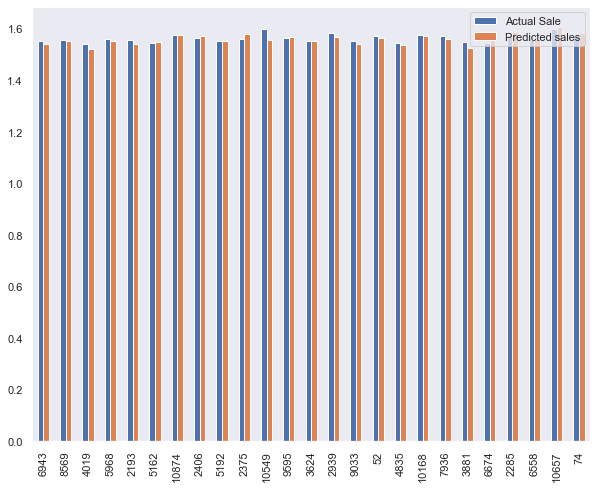

In [921]:
df_pred.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [922]:
from sklearn import metrics
print('Mean Absolute Error :', metrics.mean_absolute_error(y_act_anti, y_pred_anti))  
print('Mean Squared Error :', metrics.mean_squared_error(y_act_anti, y_pred_anti))  
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_act_anti, y_pred_anti)))

Mean Absolute Error : 0.010472630397919158
Mean Squared Error : 0.00021431118585258459
Root Mean Squared Error : 0.01463937108801415


In [923]:
SS_Residual = sum((yTrain-yPrediction)**2)
SS_Total = sum((yTrain-np.mean(yTrain))**2)
#r_squared = 1 - (float(SS_Residual))/SS_Total
r_squared=(SS_Total-SS_Residual)/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(yTrain)-1)/(len(yTrain)-xTrain.shape[1]-1)
print (r_squared, adjusted_r_squared)

0.8014342360636743 0.8009007985502212


## Question 1: Find the factors which are responsible for Price of the car

In [924]:
high_corr_features

Index(['Engine_HP', 'Price', 'No_of_year', 'num_of_feature', 'Exotic',
       'Hatchback', 'High-Performance', 'Luxury', 'Make_Oldsmobile',
       'Make_Plymouth', 'Engine_Fuel_Type_unleaded',
       'Engine_Fuel_Type_unleaded recommended',
       'Engine_Fuel_Type_unleaded required', 'Transmission_Type_AUTOMATIC',
       'Transmission_Type_MANUAL', 'Driven_Wheels_front wheel drive',
       'Vehicle_Style_Hatchback', 'sales_demand_range_less',
       'condition_notfit', 'condition_old', 'condition_vintage'],
      dtype='object')

##  Question 2: Write the equation to find price of a car

In [926]:
inter = linearRegressor.intercept_
inter

1.5700247990279868

In [928]:
coeff = linearRegressor.coef_
coeff.sort()

In [929]:
coeff

array([-0.06546118, -0.03290748, -0.00730164, -0.00578639, -0.00437144,
       -0.0030786 , -0.00187536, -0.00096675,  0.0023748 ,  0.00372217,
        0.00707783,  0.00782331,  0.00840273,  0.01441485,  0.02674186,
        0.02742068,  0.03113296,  0.03451301,  0.04330809,  0.04641883,
        0.0790549 ])

## Question 3: How the factors are affecting the price

In [940]:
high_corr_data

Engine_HP  city_mpg  Popularity     Price  No_of_year  \
Engine_HP           1.000000 -0.396280    0.046568  0.640838   -0.351844   
city_mpg           -0.396280  1.000000   -0.000549 -0.039720   -0.188417   
Popularity          0.046568 -0.000549    1.000000  0.012131   -0.085874   
Price               0.640838 -0.039720    0.012131  1.000000   -0.766695   
No_of_year         -0.351844 -0.188417   -0.085874 -0.766695    1.000000   
...                      ...       ...         ...       ...         ...   
Number_of_Doors_3  -0.067139 -0.111230    0.163677 -0.139698    0.127907   
Number_of_Doors_4  -0.089822  0.138066   -0.086779  0.124714   -0.263330   
condition_notfit   -0.217922 -0.132245   -0.025940 -0.338759    0.563760   
condition_old       0.131728 -0.007846   -0.071309  0.309820   -0.200787   
condition_vintage  -0.244288 -0.055226   -0.039577 -0.646451    0.649254   

                   num_of_feature  Crossover    Diesel    Exotic  \
Engine_HP                0.530024  -0.148671 -0.053769  0.418512   
city_mpg                -0.084787  -0.004243  0.057185 -0.102427   
Popularity              -0.062104  -0.022812  0.058510 -0.095700   
Price                    0.388929   0.038018  0.035931  0.348795   
No_of_year              -0.170410  -0.104687 -0.062349 -0.027705   
...                           ...        ...       ...       ...   
Number_of_Doors_3       -0.090908  -0.050692  0.090175 -0.038800   
Number_of_Doors_4       -0.080124   0.298594  0.010830 -0.231224   
condition_notfit        -0.110868  -0.016658 -0.057614 -0.001390   
condition_old            0.093349  -0.003310  0.030298  0.085455   
condition_vintage       -0.099452  -0.100965 -0.010609 -0.055838   

                   Factory Tuner  ...  sales_demand_range_high  \
Engine_HP               0.335034  ...                -0.012225   
city_mpg               -0.090050  ...                -0.056429   
Popularity              0.029419  ...                 0.524666   
Price                   0.149235  ...                -0.066616   
No_of_year             -0.041342  ...                 0.020778   
...                          ...  ...                      ...   
Number_of_Doors_3      -0.043452  ...                 0.188651   
Number_of_Doors_4      -0.128771  ...                -0.073475   
condition_notfit       -0.027569  ...                 0.093003   
condition_old           0.019836  ...                -0.052707   
condition_vintage      -0.033502  ...                -0.056883   

                   sales_demand_range_less  sales_demand_range_medium  \
Engine_HP                         0.210730                  -0.037039   
city_mpg                         -0.002782                   0.078245   
Popularity                       -0.103264                  -0.145987   
Price                             0.212672                   0.032463   
No_of_year                       -0.031899                  -0.055290   
...                                    ...                        ...   
Number_of_Doors_3                -0.026528                  -0.128015   
Number_of_Doors_4                -0.100578                   0.137782   
condition_notfit                 -0.027628                  -0.066546   
condition_old                     0.068241                   0.035548   
condition_vintage                -0.038176                  -0.008511   

                   popularity_range_low  popularity_range_medium  \
Engine_HP                      0.043091                -0.088082   
city_mpg                      -0.073678                 0.082112   
Popularity                     0.130745                -0.089724   
Price                         -0.024949                 0.003975   
No_of_year                     0.056869                -0.031619   
...                                 ...                      ...   
Number_of_Doors_3              0.053067                -0.070386   
Number_of_Doors_4             -0.022145                 0.043401   
conditi

## Question 4: What is the R^2 and adj. R^2 ?

In [934]:

print('Model: OLS R-squared: 0.803')

print('Model : OLS: Adj. R-squared: 0.803')

print('Model: Linear R-squared: 0.8014342360636743')

print('Adj. R-squared: 0.8009007985502212')
    

Model: OLS R-squared: 0.803
Model : OLS: Adj. R-squared: 0.803
Model: Linear R-squared: 0.8014342360636743
Adj. R-squared: 0.8009007985502212


## Question 5: What is RMSE. How to reduce it ?

In [938]:
print('OLS: Root Mean Squared Error : 0.014648219905953573')

print('Linear :Root Mean Squared Error : 0.01463937108801415')


OLS: Root Mean Squared Error : 0.014648219905953573
Linear :Root Mean Squared Error : 0.01463937108801415


##### The root-mean-square error (RMSE) is the differences between values predicted by a model and the values observed.
##### RMSE tends to be sensitive to outliers, so keeping the dataset clean from outliers will minimise the RMSE.